<img src="Local\imgs\U1\banner_fcd.jpg" alt="banner" width="1100"  height="150">

# <span style="color:black;"><strong>Desbalance de datos</strong></span>  
---
<p align="right">
  <a href="https://colab.research.google.com/github/mariabda2/intro_data_2025/blob/main/FCD_U4_desbalance_datos.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>

## <span style="color:#2F749F;"><strong>🎯 Objetivos de aprendizaje</strong></span>

✅ **Comprender** la relevancia del **desbalance de clases** en los conjuntos de datos y su influencia sobre el desempeño y la equidad de los modelos predictivos.  

✅ **Identificar** las **principales causas** y **efectos** del desbalance de datos en contextos de clasificación, así como las métricas más adecuadas para su evaluación (**precisión**, **recall**, **F1-score**, **AUC**, etc.).  

✅ **Aplicar** diferentes **estrategias de manejo del desbalance**, incluyendo técnicas de **sobremuestreo**, **submuestreo** y **generación sintética de datos** (por ejemplo, **SMOTE**), utilizando librerías de Python.  

✅ **Comparar y justificar** los resultados obtenidos con y sin balanceo, valorando el impacto en la **generalización** y la **interpretabilidad** de los modelos.  



## <span style="color:#2F749F;"><strong>Introducción</strong></span>

El **desbalance de datos** es un problema común en el ámbito del **aprendizaje automático** y la **minería de datos**, que ocurre cuando las clases o categorías dentro de un conjunto de datos están representadas de manera desigual. Esta situación puede sesgar el entrenamiento de los modelos, llevándolos a **favorecer la clase mayoritaria** y a **ignorar la clase minoritaria**, lo que afecta la calidad y la equidad de las predicciones ([He & Garcia, 2009](https://doi.org/10.1109/TKDE.2008.239); [Krawczyk, 2016](https://doi.org/10.1016/j.patrec.2015.10.015)).

El desbalance puede presentarse en diversos contextos, como la **detección de fraudes**, el **diagnóstico médico**, o la **identificación de eventos raros**, donde los casos de interés (por ejemplo, *fraude*, *enfermedad*, *anomalía*) son escasos en comparación con los casos normales. En estos escenarios, un modelo que simplemente prediga siempre la clase mayoritaria podría alcanzar una alta precisión aparente, pero con **bajo poder discriminativo**.

<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 

<b></b>

Para abordar este problema, se emplean técnicas que buscan **ajustar la distribución de clases** o **modificar el proceso de aprendizaje** del modelo. Entre ellas se incluyen los métodos de **sobremuestreo** (aumentar la representación de la clase minoritaria), **submuestreo** (reducir la clase mayoritaria) y **métodos híbridos o sintéticos**, como **SMOTE** (Synthetic Minority Over-sampling Technique). Estas estrategias, combinadas con **métricas adecuadas** de evaluación (como *recall*, *F1-score* o *AUC*), permiten mejorar la capacidad del modelo para **reconocer patrones significativos en clases poco representadas**, manteniendo la **robustez y generalización** del sistema predictivo.
</div>


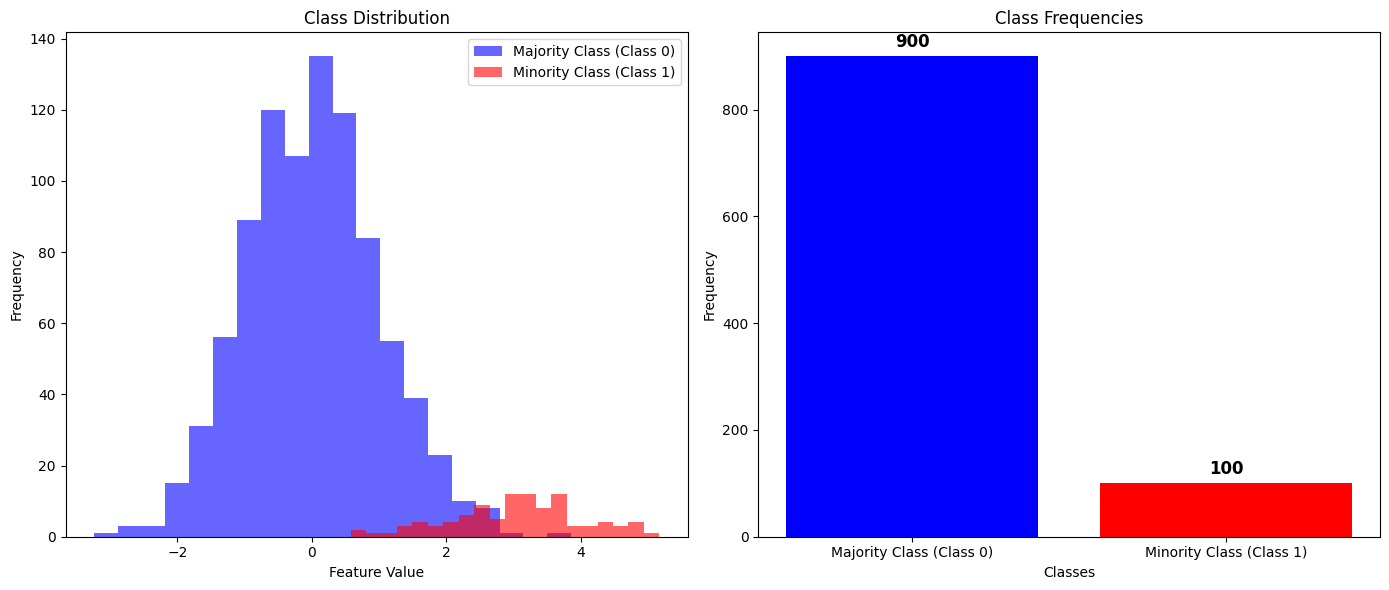

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for a majority class (Class 0)
majority_class = np.random.normal(0, 1, 900)

# Generate data for a minority class (Class 1)
minority_class = np.random.normal(3, 1, 100)

# Combine the majority and minority class data
data = np.concatenate((majority_class, minority_class))

# Create labels for the classes
labels = np.concatenate((np.zeros(900), np.ones(100)))

# Count the frequencies of each class
class_counts = [len(labels[labels == 0]), len(labels[labels == 1])]
class_names = ['Majority Class (Class 0)', 'Minority Class (Class 1)']

# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the class distribution histogram
axes[0].hist(data[labels == 0], bins=20, color='blue', alpha=0.6, label='Majority Class (Class 0)')
axes[0].hist(data[labels == 1], bins=20, color='red', alpha=0.6, label='Minority Class (Class 1)')
axes[0].set_xlabel('Feature Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Class Distribution')
axes[0].legend()

# Plot the class frequencies bar chart
bars = axes[1].bar(class_names, class_counts, color=['blue', 'red'])
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Class Frequencies')

# Add sample count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}',
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()


# <span style="color:black;"><strong>1. Métodos basados en la modificación de los datos</strong></span> 

Modifican la distribución de clases mediante técnicas de **sobremuestreo**, **submuestreo** o **generación sintética de instancias**, buscando equilibrar la representación de cada clase.  

## **a. Submuestreo (Undersampling)** 
El submuestreo consiste en **reducir la cantidad de instancias de la clase mayoritaria** con el fin de equilibrar el conjunto de datos. Aunque disminuye el sesgo hacia la clase dominante, puede implicar **pérdida de información valiosa**. Entre las variantes se incluyen *Random Undersampling*, *Tomek Links*, *Edited Nearest Neighbors (ENN)* y *Cluster Centroids* ([Kubat & Matwin, 1997](https://doi.org/10.1023/A:1009738713648); [Batista, Prati & Monard, 2004](https://doi.org/10.1007/978-3-540-24775-3_9)).  

<p align="center">
    <img src="Local\imgs\U4\undersampling.png" alt="undersampling" width="400"  height=300">
</p>

Imagen tomada de [medium.com](https://medium.com/@fernandasampaio_74014/oversampling-and-undersampling-techniques-in-fraud-prevention-53129148281a).


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟨 Random Undersampling (RUS)

**Descripción:**  
Elimina aleatoriamente muestras de la clase mayoritaria para equilibrar las proporciones entre clases [(Lemaître, 2017)](https://jmlr.org/papers/v18/16-365.html).

**Ventajas y Desventajas:**  
- Es una técnica de implementación sencilla y rápida que mejora el tiempo de entrenamiento y reduce el sesgo hacia la clase mayoritaria.  
- Sin embargo, puede implicar la pérdida de información relevante y disminuir la diversidad del conjunto de datos, afectando la representatividad global.

</div>

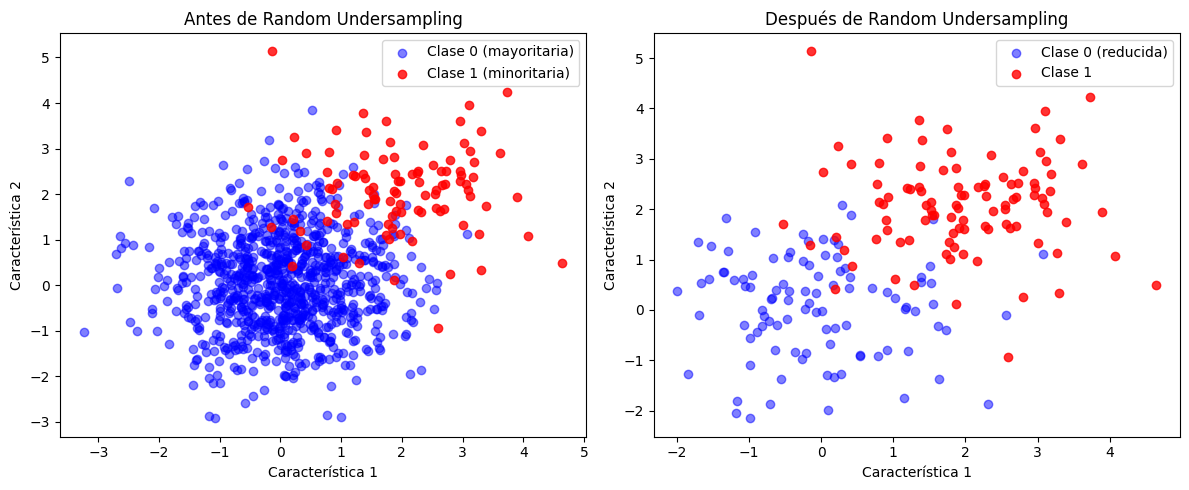

In [64]:
from imblearn.under_sampling import RandomUnderSampler
# Combinar
X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

# 2. Visualizar datos originales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.5, label='Clase 0 (mayoritaria)', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.8, label='Clase 1 (minoritaria)', color='red')
plt.title('Antes de Random Undersampling')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# 3. Aplicar Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 4. Visualizar datos después del undersampling
plt.subplot(1, 2, 2)
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], alpha=0.5, label='Clase 0 (reducida)', color='blue')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], alpha=0.8, label='Clase 1', color='red')
plt.title('Después de Random Undersampling')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟨 Tomek Links

**Descripción:**  
Identifica y elimina pares de muestras cercanas pero de clases distintas (en la frontera de decisión) [(Batista, 2004)](https://doi.org/10.1145/1007730.1007735).

**Ventajas y Desventajas:**  
- Permite limpiar ruido y eliminar ejemplos ambiguos, mejorando la definición de los límites entre clases.  
- Sin embargo, no garantiza un balance total y solo resulta útil cuando existe solapamiento entre las clases, por lo que su impacto puede ser limitado en conjuntos bien separados.


</div>

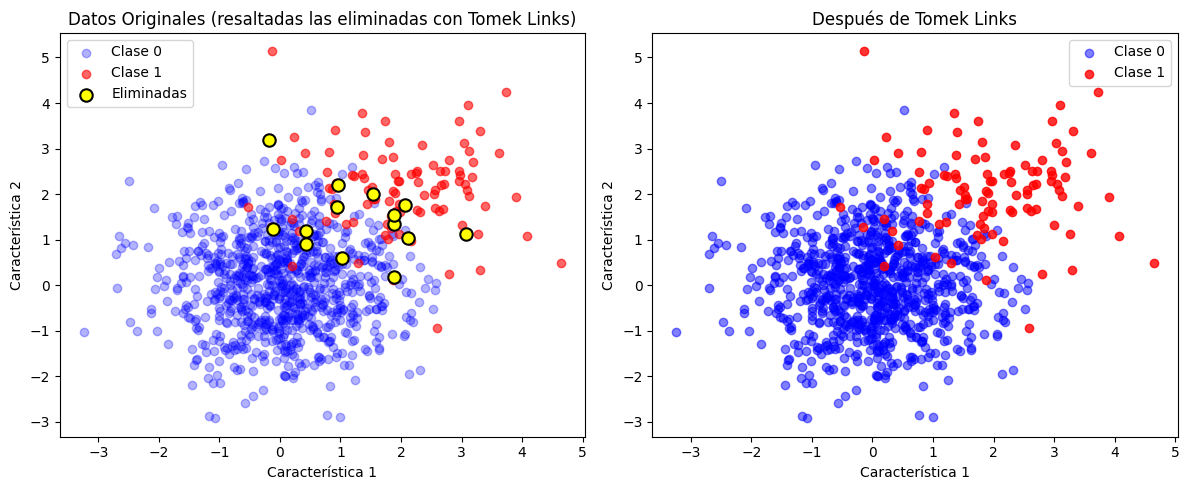

In [65]:
from imblearn.under_sampling import TomekLinks

# 1. Aplicar Tomek Links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)

# 2. Identificar las muestras eliminadas
# Tomek Links elimina muestras de la clase mayoritaria que forman pares cercanos con la minoritaria
eliminadas_mask = np.ones(len(X), dtype=bool)
eliminadas_mask[tl.sample_indices_] = False
X_eliminadas = X[eliminadas_mask]
y_eliminadas = y[eliminadas_mask]

# 3. Visualizar antes y después, resaltando las eliminadas
plt.figure(figsize=(12, 5))

# Antes con eliminadas resaltadas
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, label='Clase 0', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, label='Clase 1', color='red')
plt.scatter(X_eliminadas[:, 0], X_eliminadas[:, 1], edgecolor='black', facecolor='yellow', s=80, label='Eliminadas', linewidth=1.5)
plt.title('Datos Originales (resaltadas las eliminadas con Tomek Links)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Después
plt.subplot(1, 2, 2)
plt.scatter(X_tl[y_tl == 0][:, 0], X_tl[y_tl == 0][:, 1], alpha=0.5, label='Clase 0', color='blue')
plt.scatter(X_tl[y_tl == 1][:, 0], X_tl[y_tl == 1][:, 1], alpha=0.8, label='Clase 1', color='red')
plt.title('Después de Tomek Links')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟨 Edited Nearest Neighbors (ENN)

**Descripción:**  
Elimina muestras que no coinciden con la mayoría de sus vecinos más cercanos según la clase [(Wilson, 1972)](https://doi.org/10.1109/TSMC.1972.4309137).

**Ventajas y Desventajas:**  
- Favorece la eliminación de ruido y valores atípicos, lo que mejora la coherencia y calidad del conjunto de entrenamiento.  
- Sin embargo, puede eliminar muestras útiles en regiones con alta superposición entre clases y aumenta el costo computacional debido al cálculo de distancias vecinales.


</div>

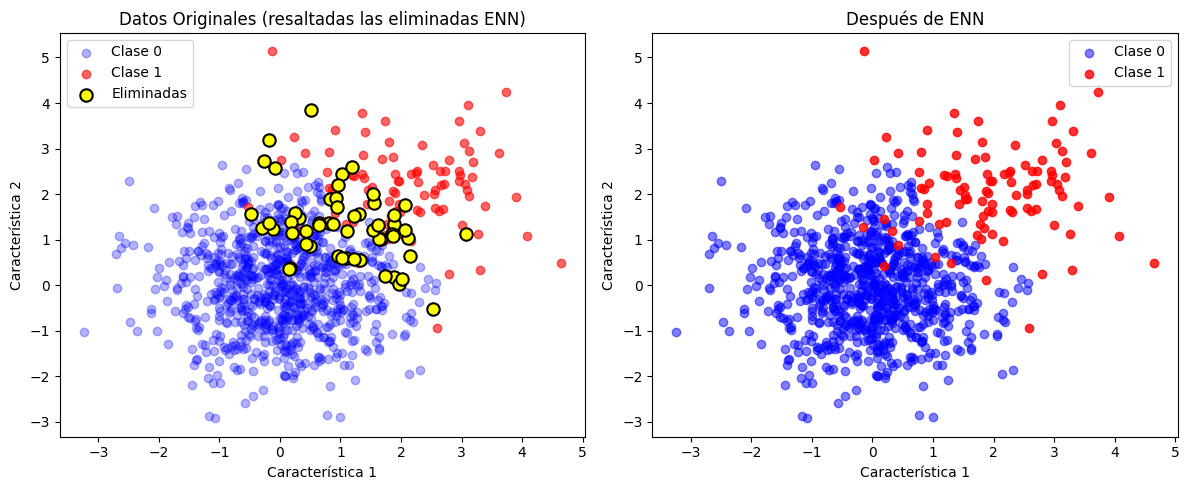

In [66]:
from imblearn.under_sampling import EditedNearestNeighbours

# 1. Aplicar ENN
enn = EditedNearestNeighbours(n_neighbors=3)
X_enn, y_enn = enn.fit_resample(X, y)

# 2. Identificar las muestras eliminadas
eliminadas_mask = np.ones(len(X), dtype=bool)
eliminadas_mask[enn.sample_indices_] = False
X_eliminadas = X[eliminadas_mask]
y_eliminadas = y[eliminadas_mask]

# 3. Visualizar antes y después, resaltando las eliminadas
plt.figure(figsize=(12, 5))

# Antes con eliminadas resaltadas
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, label='Clase 0', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, label='Clase 1', color='red')
plt.scatter(X_eliminadas[:, 0], X_eliminadas[:, 1], edgecolor='black', facecolor='yellow', s=80, label='Eliminadas', linewidth=1.5)
plt.title('Datos Originales (resaltadas las eliminadas ENN)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Después
plt.subplot(1, 2, 2)
plt.scatter(X_enn[y_enn == 0][:, 0], X_enn[y_enn == 0][:, 1], alpha=0.5, label='Clase 0', color='blue')
plt.scatter(X_enn[y_enn == 1][:, 0], X_enn[y_enn == 1][:, 1], alpha=0.8, label='Clase 1', color='red')
plt.title('Después de ENN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟨 Cluster Centroids

**Descripción:**  
Sustituye la clase mayoritaria por los centroides de grupos formados mediante clustering (por ejemplo, K-means) [(Japkowicz, 2002)](https://doi.org/10.3233/IDA-2002-6504).

**Ventajas y Desvetajas:**  
- Mantiene la estructura global del conjunto de datos y reduce su tamaño al conservar patrones representativos.  
- No obstante, puede perder detalles locales y depende de una correcta elección del número de clústeres, lo que influye directamente en la calidad del muestreo.

</div>

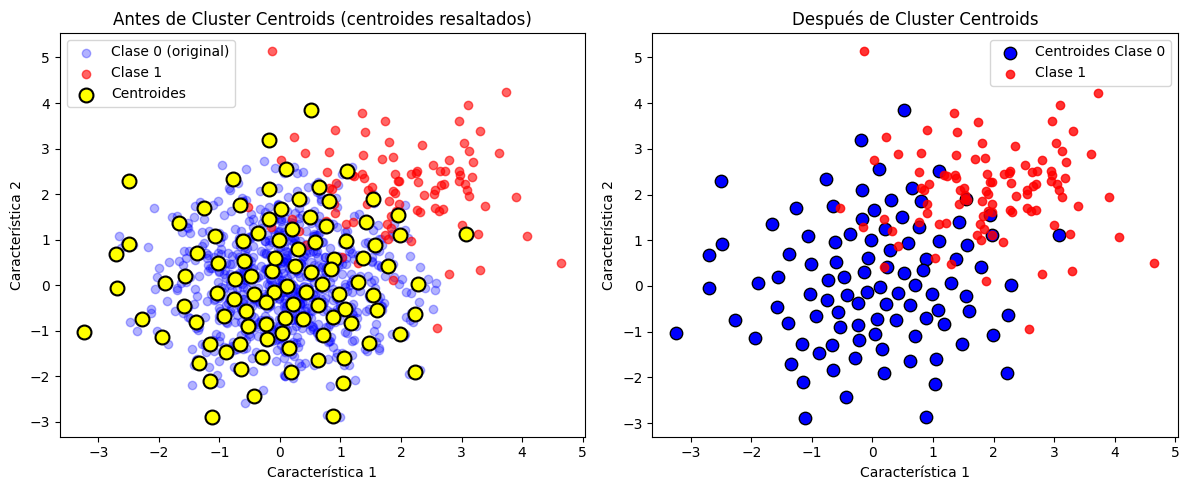

In [67]:
from imblearn.under_sampling import ClusterCentroids

# 1. Aplicar Cluster Centroids
cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(X, y)

# 2. Extraer los centroides generados (clase 0) y la clase 1
X_centroids = X_cc[y_cc == 0]
X_minority_cc = X_cc[y_cc == 1]

# 3. Visualizar antes y después, resaltando los centroides
plt.figure(figsize=(12, 5))

# Antes: datos originales + centroides resaltados
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, label='Clase 0 (original)', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, label='Clase 1', color='red')
plt.scatter(X_centroids[:, 0], X_centroids[:, 1], edgecolor='black', facecolor='yellow', s=100, label='Centroides', linewidth=1.5)
plt.title('Antes de Cluster Centroids (centroides resaltados)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Después: solo centroides + clase 1
plt.subplot(1, 2, 2)
plt.scatter(X_centroids[:, 0], X_centroids[:, 1], label='Centroides Clase 0', color='blue', edgecolor='black', s=80)
plt.scatter(X_minority_cc[:, 0], X_minority_cc[:, 1], label='Clase 1', color='red', alpha=0.8)
plt.title('Después de Cluster Centroids')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟨 Comparación de técnicas


</div>

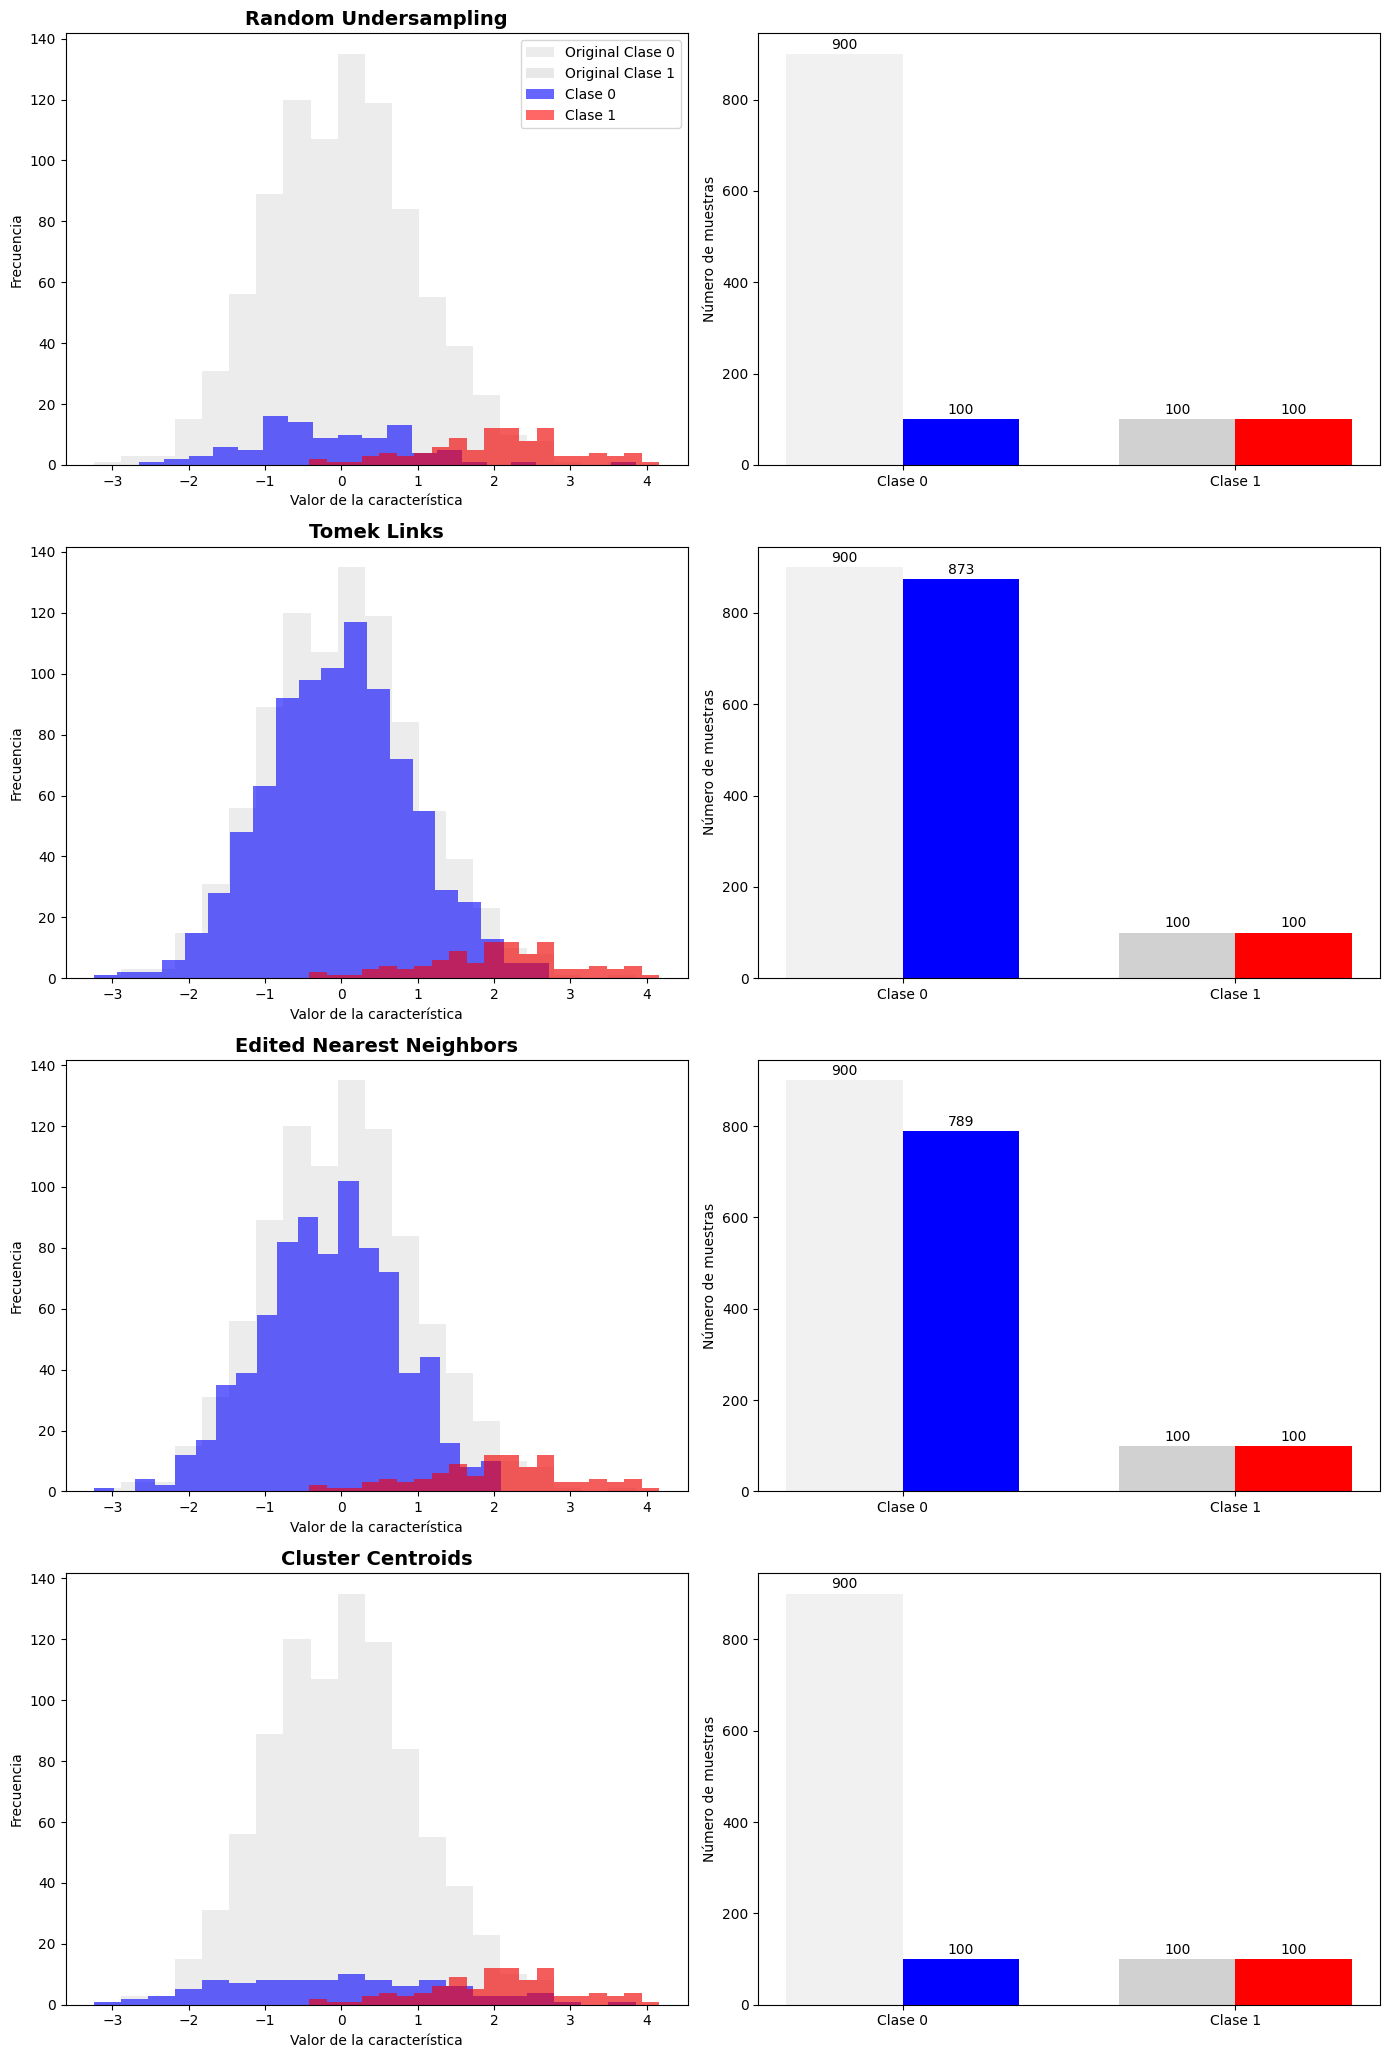

In [76]:
# Datos originales (ya generados previamente)
X = np.concatenate((majority_class, minority_class)).reshape(-1, 1)
y = np.concatenate((np.zeros(len(majority_class)), np.ones(len(minority_class))))

# Guardar distribución original
X_orig = X
y_orig = y
original_counts = [np.sum(y_orig == 0), np.sum(y_orig == 1)]

# Técnicas de submuestreo (sin incluir la original)
methods = {
    'Random Undersampling': RandomUnderSampler(random_state=42).fit_resample(X, y),
    'Tomek Links': TomekLinks().fit_resample(X, y),
    'Edited Nearest Neighbors': EditedNearestNeighbours(n_neighbors=3).fit_resample(X, y),
    'Cluster Centroids': ClusterCentroids(random_state=42).fit_resample(X, y)
}

# Crear figura con subplots: 4 filas, 2 columnas
fig, axes = plt.subplots(len(methods), 2, figsize=(14, 22))
fig.subplots_adjust(hspace=1.4)

# Graficar cada técnica
for i, (name, (X_res, y_res)) in enumerate(methods.items()):
    # Título centrado solo en la columna izquierda
    axes[i, 0].set_title(name, fontsize=14, fontweight='bold', loc='center')

    # Histograma con superposición de distribución original
    axes[i, 0].hist(X_orig[y_orig == 0], bins=20, color='gray', alpha=0.15, label='Original Clase 0')
    axes[i, 0].hist(X_orig[y_orig == 1], bins=20, color='dimgray', alpha=0.15, label='Original Clase 1')
    axes[i, 0].hist(X_res[y_res == 0], bins=20, color='blue', alpha=0.6, label='Clase 0')
    axes[i, 0].hist(X_res[y_res == 1], bins=20, color='red', alpha=0.6, label='Clase 1')
    axes[i, 0].set_xlabel('Valor de la característica')
    axes[i, 0].set_ylabel('Frecuencia')
    if i == 0:
        axes[i, 0].legend()

    # Gráfico de barras comparando con original
    current_counts = [np.sum(y_res == 0), np.sum(y_res == 1)]
    bar_labels = ['Clase 0', 'Clase 1']
    x = np.arange(len(bar_labels))
    width = 0.35

    bars1 = axes[i, 1].bar(x - width/2, original_counts, width, label='Original', color=['lightgray','dimgray'], alpha=0.3)
    bars2 = axes[i, 1].bar(x + width/2, current_counts, width, label='Actual', color=['blue', 'red'])

    axes[i, 1].set_ylabel('Número de muestras')
    axes[i, 1].set_xticks(x)
    axes[i, 1].set_xticklabels(bar_labels)

    # Etiquetas en la parte superior de cada barra
    for bar in list(bars1) + list(bars2):
        height = bar.get_height()
        axes[i, 1].text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                        ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()



## **b. Sobremuestreo (Oversampling)**  
El sobremuestreo incrementa la representación de la clase minoritaria mediante **duplicación o generación sintética de ejemplos**. Este enfoque preserva la información de la clase mayoritaria, aunque puede inducir **sobreajuste**. Las técnicas más usadas son *Random Oversampling*, *SMOTE (Synthetic Minority Over-sampling Technique)*, *ADASYN* y *Borderline-SMOTE* ([Chawla et al., 2002](https://doi.org/10.1613/jair.953); [He et al., 2008](https://doi.org/10.1109/TPAMI.2008.239)).  

<p align="center">
    <img src="Local\imgs\U4\oversampling.png" alt="oversampling" width="400"  height=300">
</p>


Imagen tomada de [medium.com](https://medium.com/@fernandasampaio_74014/oversampling-and-undersampling-techniques-in-fraud-prevention-53129148281a).




<div style="background-color:#e3f2fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟦 Random Oversampling (ROS)

**Descripción:**  
Duplica aleatoriamente ejemplos de la clase minoritaria para equilibrar las proporciones entre clases [(Lemaître et al., 2017)](https://jmlr.org/papers/v18/16-365.html).

**Ventajas y Desventajas:**  
- Es una técnica simple y eficaz que mejora la representación de la clase minoritaria y evita el sesgo del modelo.  
- No obstante, puede incrementar el riesgo de sobreajuste al replicar exactamente los mismos ejemplos, reduciendo la capacidad de generalización.

</div>

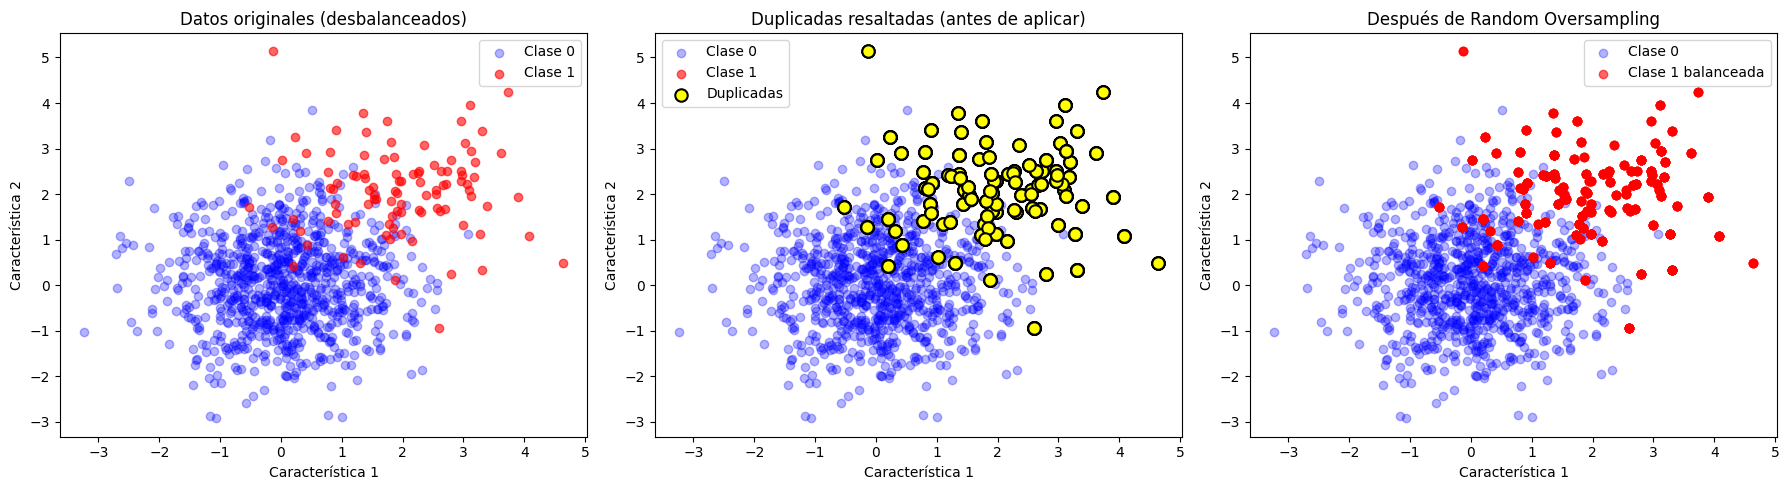

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# 1. Generar datos simulados con dos características
np.random.seed(42)
X_majority = np.random.normal(loc=0, scale=1, size=(900, 2))  # Clase 0
y_majority = np.zeros(900)

X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))  # Clase 1
y_minority = np.ones(100)

X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

# 2. Aplicar Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# 3. Identificar las muestras duplicadas
n_original = len(X)
duplicated_indices = ros.sample_indices_[n_original:]
X_duplicadas = X_ros[duplicated_indices]

# 4. Visualizar en 3 subplots
plt.figure(figsize=(18, 5))

# Gráfico 1: Datos originales
plt.subplot(1, 3, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, label='Clase 0', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, label='Clase 1', color='red')
plt.title('Datos originales (desbalanceados)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 2: Muestras duplicadas resaltadas
plt.subplot(1, 3, 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, color='red', label='Clase 1')
plt.scatter(X_duplicadas[:, 0], X_duplicadas[:, 1], edgecolor='black', facecolor='yellow',
            s=80, linewidth=1.5, label='Duplicadas')
plt.title('Duplicadas resaltadas (antes de aplicar)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 3: Conjunto balanceado final
plt.subplot(1, 3, 3)
plt.scatter(X_ros[y_ros == 0][:, 0], X_ros[y_ros == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X_ros[y_ros == 1][:, 0], X_ros[y_ros == 1][:, 1], alpha=0.6, color='red', label='Clase 1 balanceada')
plt.title('Después de Random Oversampling')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


<div style="background-color:#e3f2fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟦 SMOTE (Synthetic Minority Over-sampling Technique)

**Descripción:**  
Genera nuevas muestras sintéticas de la clase minoritaria interpolando entre ejemplos existentes [(Chawla et al., 2002)](https://doi.org/10.1613/jair.953).

**Ventajas y Desventajas:**  
- Mejora la generalización del modelo al crear ejemplos más diversos y realistas de la clase minoritaria.  
- Sin embargo, puede generar muestras artificiales poco representativas en regiones con ruido o solapamiento entre clases.

</div>


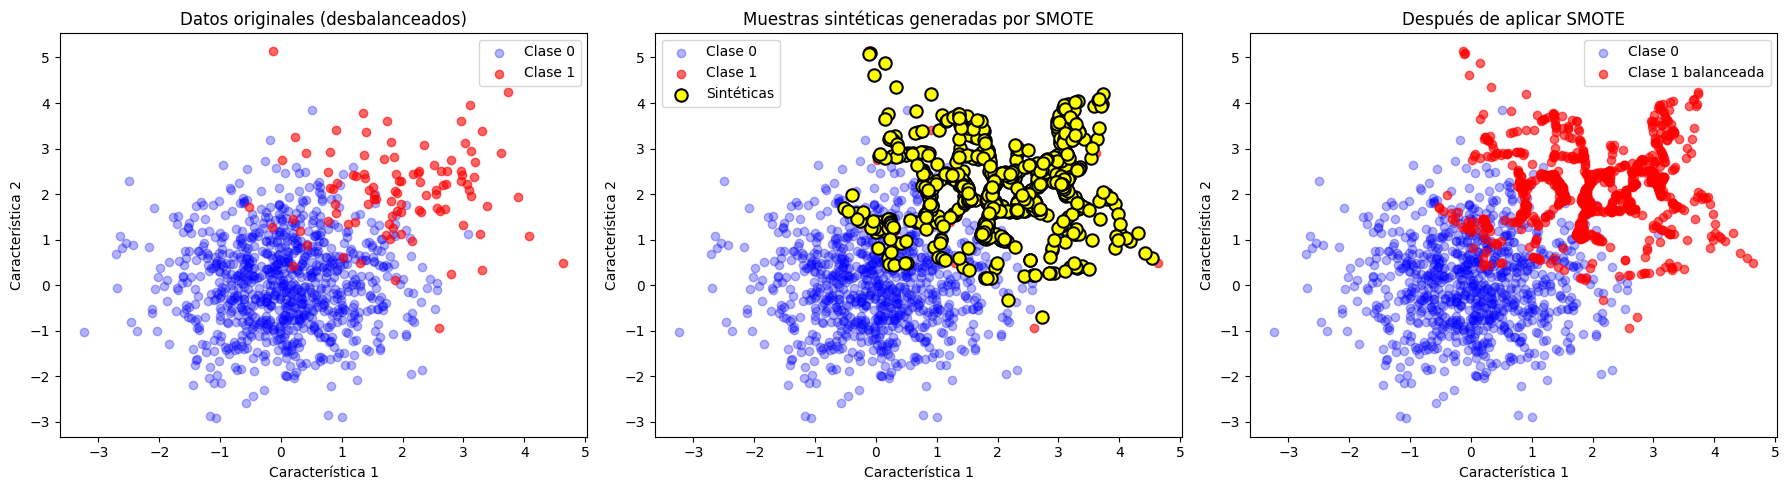

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# 1. Generar datos simulados con dos características
np.random.seed(42)
X_majority = np.random.normal(loc=0, scale=1, size=(900, 2))  # Clase 0
y_majority = np.zeros(900)

X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))  # Clase 1
y_minority = np.ones(100)

X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

# 2. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# 3. Identificar las muestras sintéticas
n_original = len(X)
synthetic_indices = np.arange(n_original, len(X_smote))
X_sinteticas = X_smote[synthetic_indices]

# 4. Visualizar en 3 subplots
plt.figure(figsize=(18, 5))

# Gráfico 1: Datos originales
plt.subplot(1, 3, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, label='Clase 0', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, label='Clase 1', color='red')
plt.title('Datos originales (desbalanceados)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 2: Muestras sintéticas resaltadas
plt.subplot(1, 3, 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, color='red', label='Clase 1')
plt.scatter(X_sinteticas[:, 0], X_sinteticas[:, 1], edgecolor='black', facecolor='yellow',
            s=80, linewidth=1.5, label='Sintéticas')
plt.title('Muestras sintéticas generadas por SMOTE')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 3: Conjunto balanceado final
plt.subplot(1, 3, 3)
plt.scatter(X_smote[y_smote == 0][:, 0], X_smote[y_smote == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X_smote[y_smote == 1][:, 0], X_smote[y_smote == 1][:, 1], alpha=0.6, color='red', label='Clase 1 balanceada')
plt.title('Después de aplicar SMOTE')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


<div style="background-color:#e3f2fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟦 ADASYN (Adaptive Synthetic Sampling)

**Descripción:**  
Crea ejemplos sintéticos adaptativos priorizando las áreas donde la clase minoritaria es más difícil de aprender [(He et al., 2008)](https://doi.org/10.1109/IJCNN.2008.4633969).

**Ventajas y Desventajas:**  
- Favorece el aprendizaje de zonas complejas al enfocar la generación sintética en regiones con menor densidad de la clase minoritaria.  
- Sin embargo, puede amplificar el ruido y producir ejemplos poco realistas si los datos están mal distribuidos.

</div>

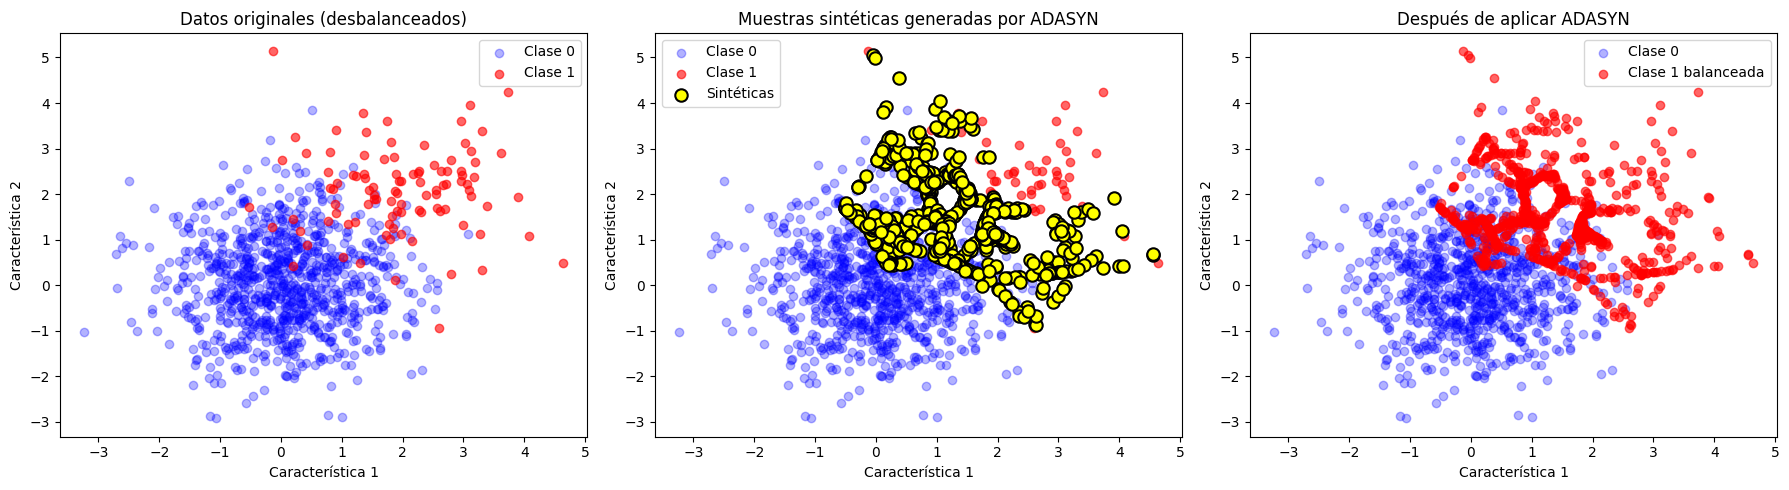

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN

# 1. Generar datos simulados con dos características
np.random.seed(42)
X_majority = np.random.normal(loc=0, scale=1, size=(900, 2))  # Clase 0
y_majority = np.zeros(900)

X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))  # Clase 1
y_minority = np.ones(100)

X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

# 2. Aplicar ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# 3. Identificar las muestras sintéticas
n_original = len(X)
synthetic_indices = np.arange(n_original, len(X_adasyn))
X_sinteticas = X_adasyn[synthetic_indices]

# 4. Visualizar en 3 subplots
plt.figure(figsize=(18, 5))

# Gráfico 1: Datos originales
plt.subplot(1, 3, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, label='Clase 0', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, label='Clase 1', color='red')
plt.title('Datos originales (desbalanceados)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 2: Muestras sintéticas resaltadas
plt.subplot(1, 3, 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, color='red', label='Clase 1')
plt.scatter(X_sinteticas[:, 0], X_sinteticas[:, 1], edgecolor='black', facecolor='yellow',
            s=80, linewidth=1.5, label='Sintéticas')
plt.title('Muestras sintéticas generadas por ADASYN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 3: Conjunto balanceado final
plt.subplot(1, 3, 3)
plt.scatter(X_adasyn[y_adasyn == 0][:, 0], X_adasyn[y_adasyn == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X_adasyn[y_adasyn == 1][:, 0], X_adasyn[y_adasyn == 1][:, 1], alpha=0.6, color='red', label='Clase 1 balanceada')
plt.title('Después de aplicar ADASYN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


<div style="background-color:#e3f2fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟦 Comparación de técnicas


</div>

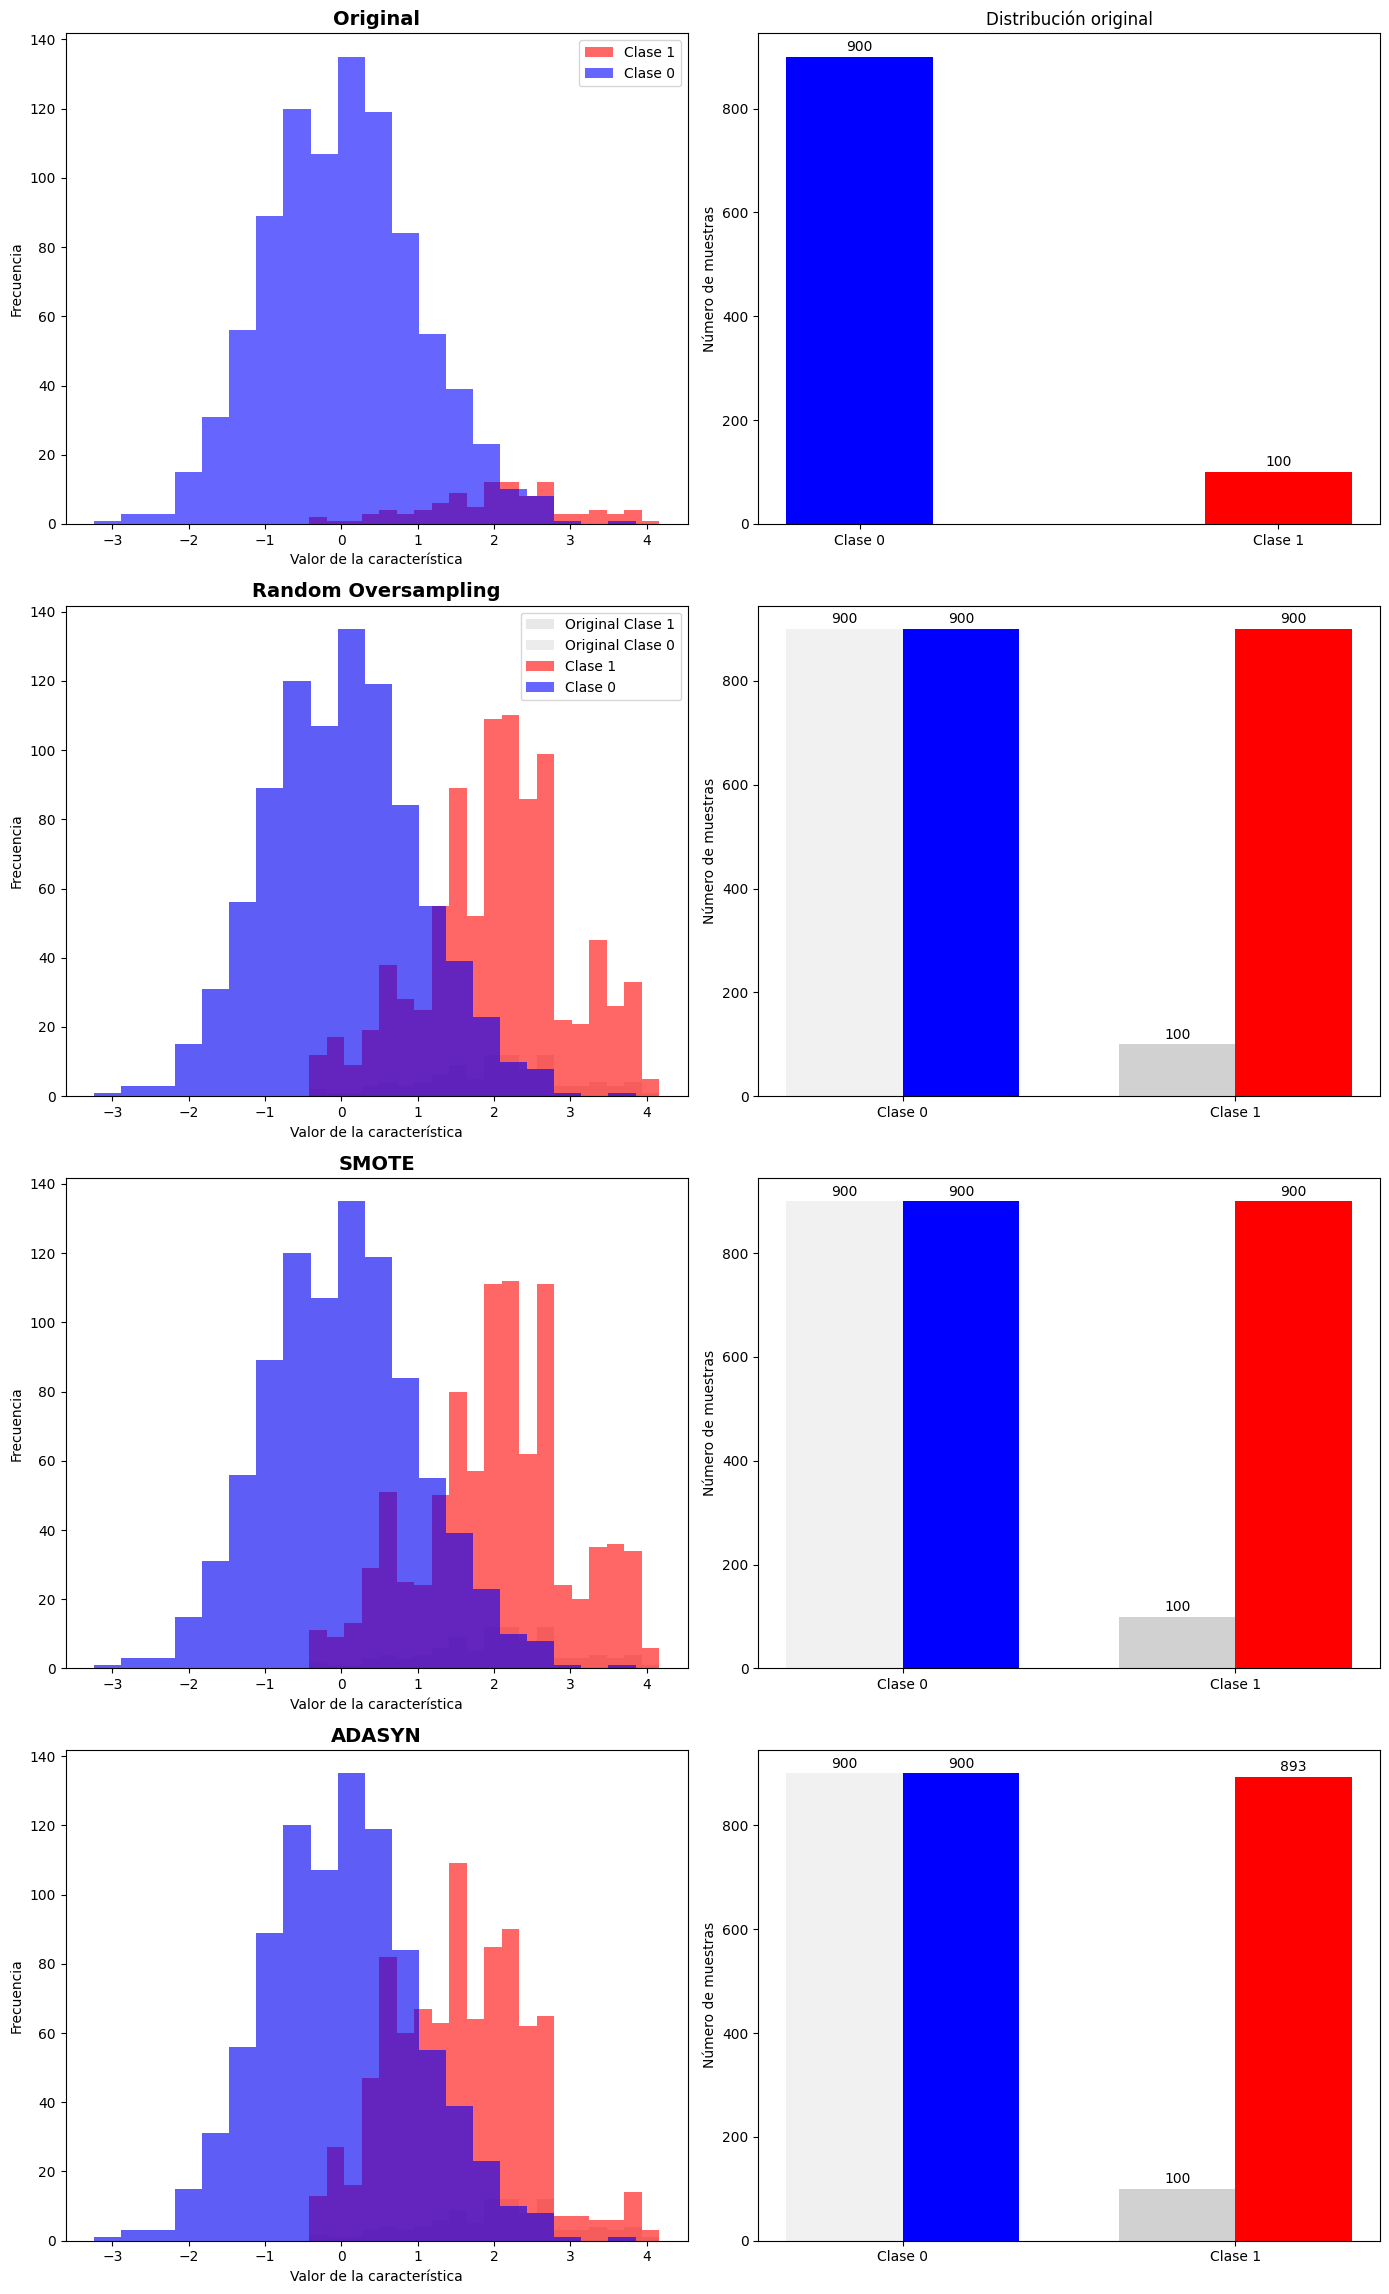

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# 1. Generar datos simulados univariados
np.random.seed(42)
majority_class = np.random.normal(loc=0, scale=1, size=900)
minority_class = np.random.normal(loc=2, scale=1, size=100)

# 2. Datos originales
X = np.concatenate((majority_class, minority_class)).reshape(-1, 1)
y = np.concatenate((np.zeros(len(majority_class)), np.ones(len(minority_class))))

X_orig = X
y_orig = y
original_counts = [np.sum(y_orig == 0), np.sum(y_orig == 1)]

# 3. Aplicar técnicas de sobremuestreo
methods = {
    'Random Oversampling': RandomOverSampler(random_state=42).fit_resample(X, y),
    'SMOTE': SMOTE(random_state=42).fit_resample(X, y),
    'ADASYN': ADASYN(random_state=42).fit_resample(X, y)
}

# 4. Crear figura con subplots: 4 filas (1 original + 3 técnicas), 2 columnas
fig, axes = plt.subplots(len(methods) + 1, 2, figsize=(14, 24))
fig.subplots_adjust(hspace=1.4)

# 5. Fila 0: Datos originales
axes[0, 0].set_title('Original', fontsize=14, fontweight='bold', loc='center')
axes[0, 0].hist(X_orig[y_orig == 1], bins=20, color='red', alpha=0.6, label='Clase 1')
axes[0, 0].hist(X_orig[y_orig == 0], bins=20, color='blue', alpha=0.6, label='Clase 0')
axes[0, 0].set_xlabel('Valor de la característica')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()

bar_labels = ['Clase 0', 'Clase 1']
x = np.arange(len(bar_labels))
width = 0.35
bars = axes[0, 1].bar(x, original_counts, width, color=['blue', 'red'])
axes[0, 1].set_ylabel('Número de muestras')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(bar_labels)
axes[0, 1].set_title('Distribución original')
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=10)

# 6. Filas siguientes: técnicas de sobremuestreo
for i, (name, (X_res, y_res)) in enumerate(methods.items(), start=1):
    axes[i, 0].set_title(name, fontsize=14, fontweight='bold', loc='center')

    # Histograma con superposición de distribución original
    axes[i, 0].hist(X_orig[y_orig == 1], bins=20, color='dimgray', alpha=0.15, label='Original Clase 1')
    axes[i, 0].hist(X_orig[y_orig == 0], bins=20, color='gray', alpha=0.15, label='Original Clase 0')
    axes[i, 0].hist(X_res[y_res == 1], bins=20, color='red', alpha=0.6, label='Clase 1')
    axes[i, 0].hist(X_res[y_res == 0], bins=20, color='blue', alpha=0.6, label='Clase 0')
    axes[i, 0].set_xlabel('Valor de la característica')
    axes[i, 0].set_ylabel('Frecuencia')
    if i == 1:
        axes[i, 0].legend()

    # Gráfico de barras comparando con original
    current_counts = [np.sum(y_res == 0), np.sum(y_res == 1)]
    bars1 = axes[i, 1].bar(x - width/2, original_counts, width, label='Original', color=['lightgray','dimgray'], alpha=0.3)
    bars2 = axes[i, 1].bar(x + width/2, current_counts, width, label='Actual', color=['blue', 'red'])

    axes[i, 1].set_ylabel('Número de muestras')
    axes[i, 1].set_xticks(x)
    axes[i, 1].set_xticklabels(bar_labels)

    for bar in list(bars1) + list(bars2):
        height = bar.get_height()
        axes[i, 1].text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                        ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



## **c. Métodos híbridos**  
Los métodos híbridos combinan **sobremuestreo y submuestreo** para aprovechar las ventajas de ambos enfoques, reduciendo la redundancia de datos sintéticos y el riesgo de pérdida de información. Ejemplos comunes incluyen *SMOTE + Tomek Links* y *SMOTE + ENN*, los cuales mejoran la **separabilidad de clases** y reducen el ruido en los bordes de decisión ([Batista et al., 2004](https://doi.org/10.1007/978-3-540-24775-3_9)).  


<div style="background-color:#e8f5e9; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟩 Borderline-SMOTE

**Descripción:**  
Genera muestras sintéticas cercanas a la frontera entre clases, enfocándose en los ejemplos más difíciles de clasificar [(Han et al., 2005)](https://doi.org/10.1007/11538059_91).

**Ventajas y Desventajas:**  
- Refuerza la capacidad del modelo para distinguir límites de decisión y mejora el desempeño en datos con fronteras difusas.  
- Sin embargo, puede incrementar el riesgo de sobreajuste si se generan muestras excesivas en regiones ambiguas.

</div>

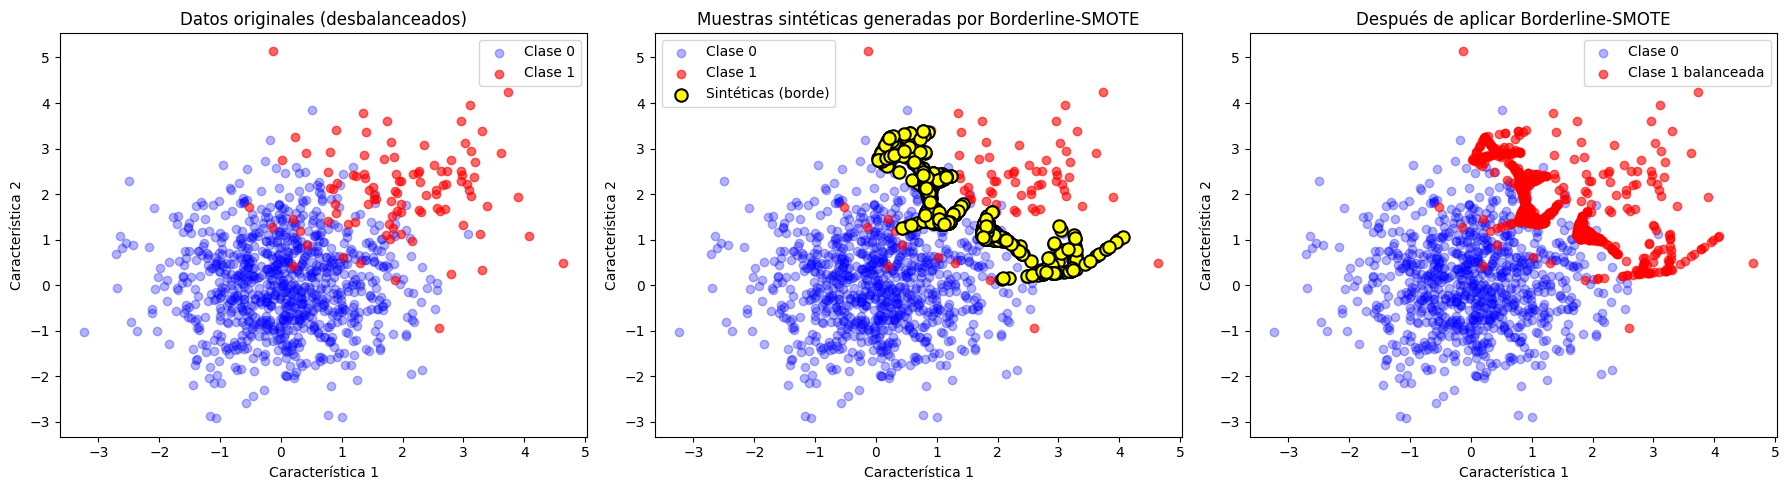

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE

# 1. Generar datos simulados con dos características
np.random.seed(42)
X_majority = np.random.normal(loc=0, scale=1, size=(900, 2))  # Clase 0
y_majority = np.zeros(900)

X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))  # Clase 1
y_minority = np.ones(100)

X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

# 2. Aplicar Borderline-SMOTE
bsmote = BorderlineSMOTE(random_state=42, kind='borderline-1')
X_bsmote, y_bsmote = bsmote.fit_resample(X, y)

# 3. Identificar las muestras sintéticas
n_original = len(X)
synthetic_indices = np.arange(n_original, len(X_bsmote))
X_sinteticas = X_bsmote[synthetic_indices]

# 4. Visualizar en 3 subplots
plt.figure(figsize=(18, 5))

# Gráfico 1: Datos originales
plt.subplot(1, 3, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, label='Clase 0', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, label='Clase 1', color='red')
plt.title('Datos originales (desbalanceados)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 2: Muestras sintéticas resaltadas
plt.subplot(1, 3, 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, color='red', label='Clase 1')
plt.scatter(X_sinteticas[:, 0], X_sinteticas[:, 1], edgecolor='black', facecolor='yellow',
            s=80, linewidth=1.5, label='Sintéticas (borde)')
plt.title('Muestras sintéticas generadas por Borderline-SMOTE')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 3: Conjunto balanceado final
plt.subplot(1, 3, 3)
plt.scatter(X_bsmote[y_bsmote == 0][:, 0], X_bsmote[y_bsmote == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X_bsmote[y_bsmote == 1][:, 0], X_bsmote[y_bsmote == 1][:, 1], alpha=0.6, color='red', label='Clase 1 balanceada')
plt.title('Después de aplicar Borderline-SMOTE')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


<div style="background-color:#e8f5e9; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟩 SMOTE + ENN (SMOTEENN)

**Descripción:**  
Método híbrido que aplica primero SMOTE para generar ejemplos sintéticos de la clase minoritaria y luego utiliza Edited Nearest Neighbors (ENN) para eliminar instancias ruidosas o ambiguas del conjunto resultante, limpiando las fronteras de decisión [(Chawla et al., 2002)](https://doi.org/10.1613/jair.953); [(Wilson, 1972)](https://doi.org/10.1109/TSMC.1972.4309137); implementación comúnmente citada en herramientas como *imbalanced-learn* [(Lemaître et al., 2017)](https://jmlr.org/papers/v18/16-365.html).

**Ventajas y Desventajas:**  
- Combina la capacidad de SMOTE para aumentar la representación de la clase minoritaria con la capacidad de ENN para limpiar ruido y mejorar la definición de la frontera, lo que puede mejorar la precisión y la robustez del clasificador.  
- Por otro lado, es un procedimiento más costoso computacionalmente y existe el riesgo de eliminar ejemplos minoritarios valiosos durante la etapa de limpieza; además, si los datos contienen mucho ruido, SMOTE podría amplificarlo antes de que ENN lo elimine.

</div>


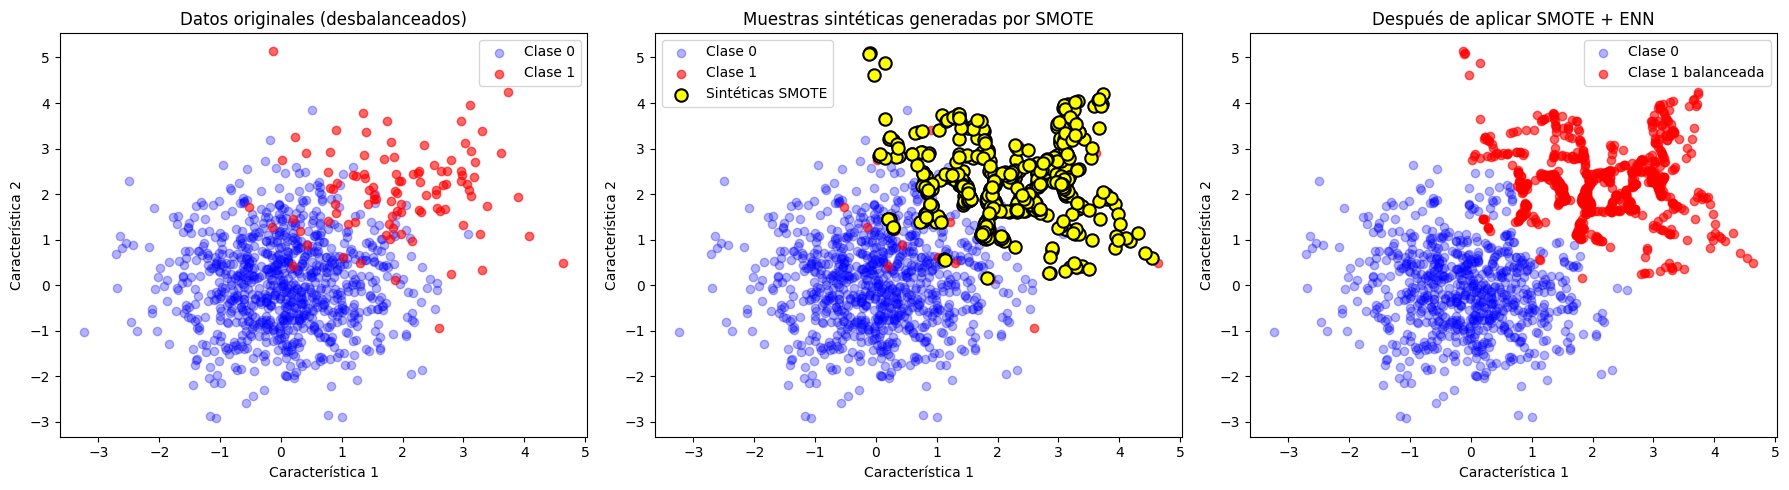

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN

# 1. Generar datos simulados con dos características
np.random.seed(42)
X_majority = np.random.normal(loc=0, scale=1, size=(900, 2))  # Clase 0
y_majority = np.zeros(900)

X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))  # Clase 1
y_minority = np.ones(100)

X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

# 2. Aplicar SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_combined, y_combined = smote_enn.fit_resample(X, y)

# 3. Identificar muestras sintéticas generadas por SMOTE
n_original = len(X)
synthetic_indices = np.arange(n_original, len(X_combined))
X_sinteticas = X_combined[synthetic_indices]

# 4. Visualizar en 3 subplots
plt.figure(figsize=(18, 5))

# Gráfico 1: Datos originales
plt.subplot(1, 3, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, label='Clase 0', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, label='Clase 1', color='red')
plt.title('Datos originales (desbalanceados)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 2: Muestras sintéticas resaltadas
plt.subplot(1, 3, 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.6, color='red', label='Clase 1')
plt.scatter(X_sinteticas[:, 0], X_sinteticas[:, 1], edgecolor='black', facecolor='yellow',
            s=80, linewidth=1.5, label='Sintéticas SMOTE')
plt.title('Muestras sintéticas generadas por SMOTE')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Gráfico 3: Conjunto final tras SMOTE + ENN
plt.subplot(1, 3, 3)
plt.scatter(X_combined[y_combined == 0][:, 0], X_combined[y_combined == 0][:, 1], alpha=0.3, color='blue', label='Clase 0')
plt.scatter(X_combined[y_combined == 1][:, 0], X_combined[y_combined == 1][:, 1], alpha=0.6, color='red', label='Clase 1 balanceada')
plt.title('Después de aplicar SMOTE + ENN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


<div style="background-color:#e8f5e9; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

### 🟩 Comparación de técnicas

</div>

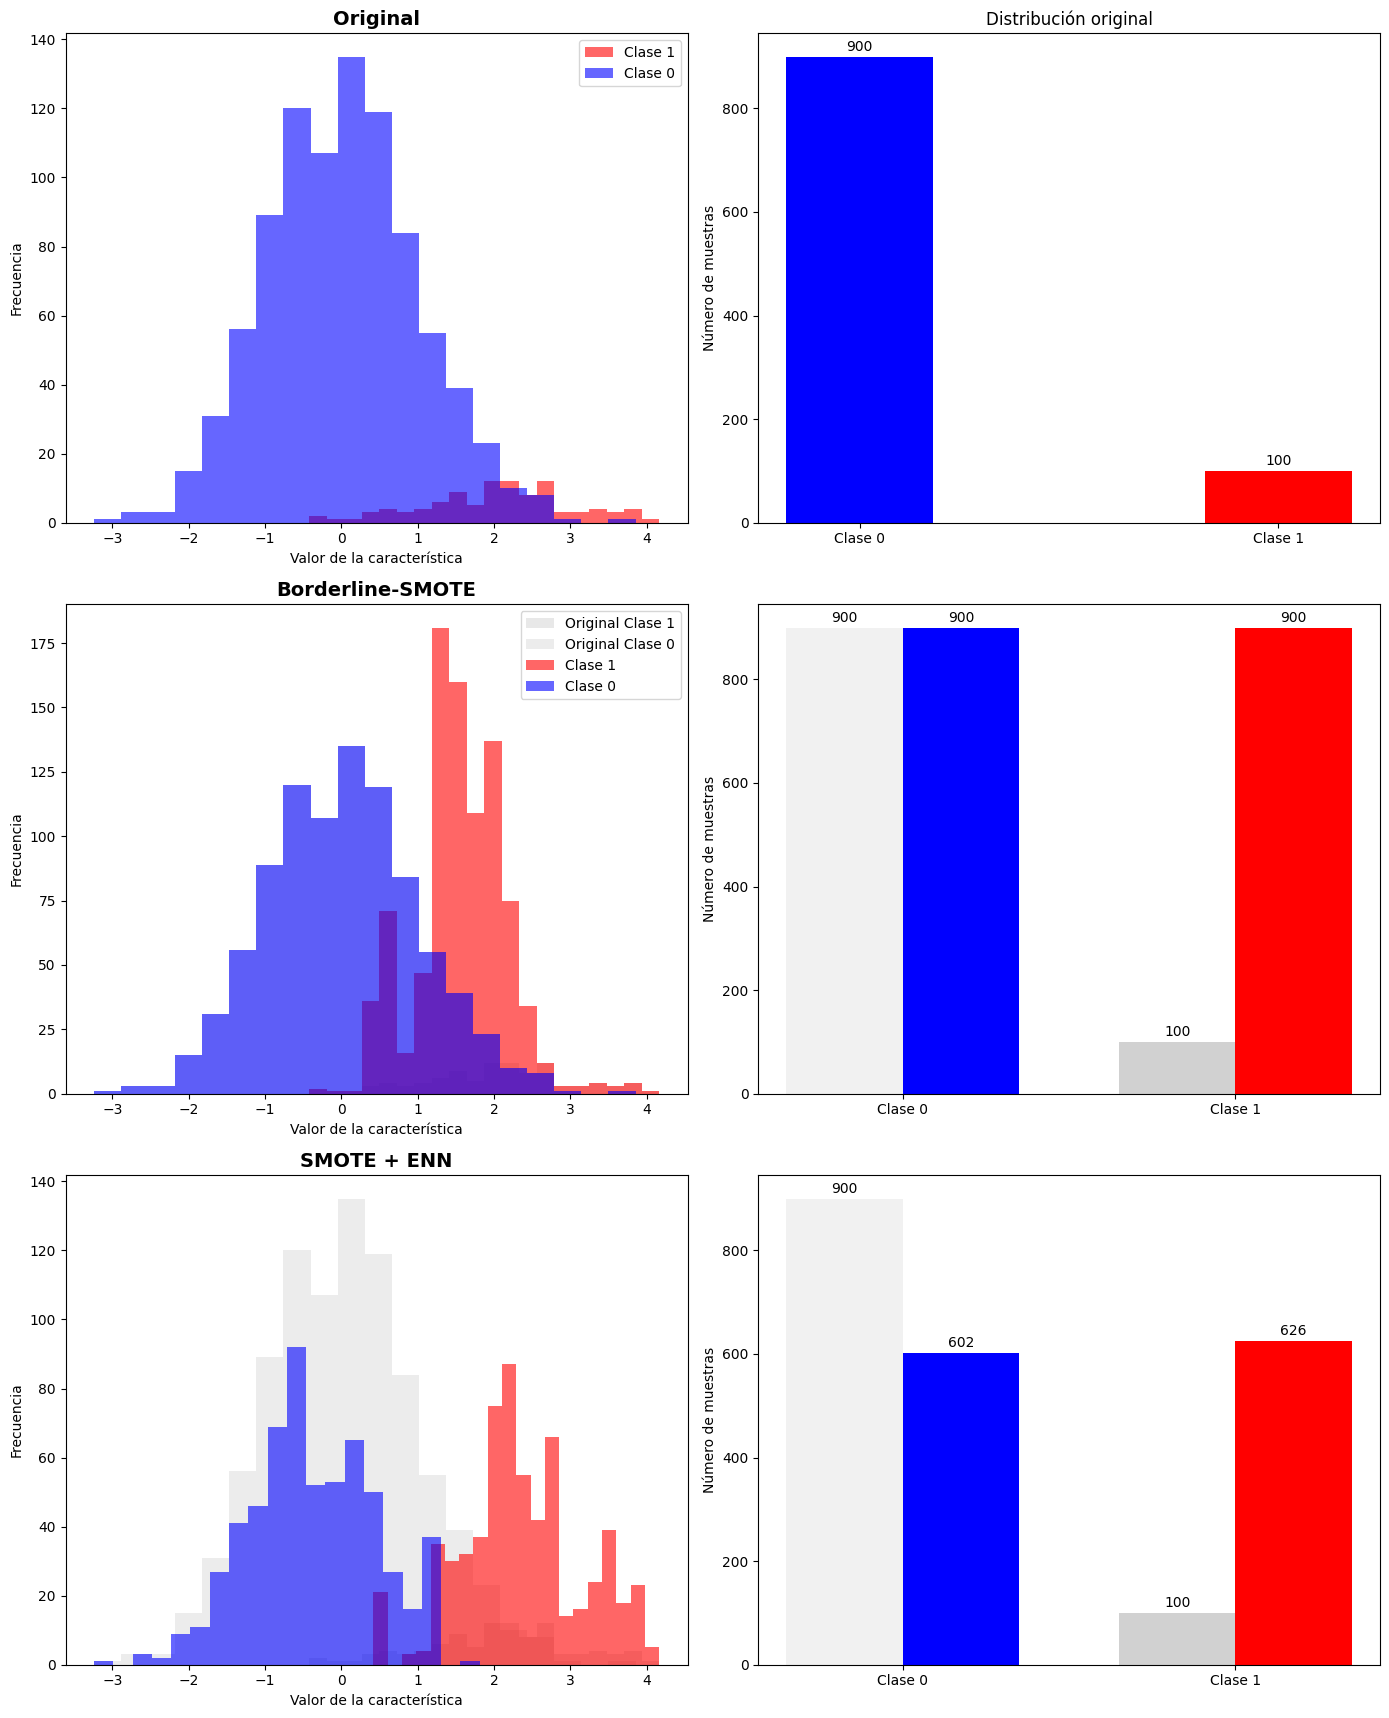

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import BorderlineSMOTE

# 1. Generar datos simulados univariados
np.random.seed(42)
majority_class = np.random.normal(loc=0, scale=1, size=900)
minority_class = np.random.normal(loc=2, scale=1, size=100)

# 2. Datos originales
X = np.concatenate((majority_class, minority_class)).reshape(-1, 1)
y = np.concatenate((np.zeros(len(majority_class)), np.ones(len(minority_class))))

X_orig = X
y_orig = y
original_counts = [np.sum(y_orig == 0), np.sum(y_orig == 1)]

# 3. Aplicar técnicas combinadas
methods = {
    'Borderline-SMOTE': BorderlineSMOTE(kind='borderline-1', random_state=42).fit_resample(X, y),
    'SMOTE + ENN': SMOTEENN(random_state=42).fit_resample(X, y)
}

# 4. Crear figura con subplots: 3 filas (1 original + 2 técnicas), 2 columnas
fig, axes = plt.subplots(len(methods) + 1, 2, figsize=(14, 18))
fig.subplots_adjust(hspace=1.4)

# 5. Fila 0: Datos originales
axes[0, 0].set_title('Original', fontsize=14, fontweight='bold', loc='center')
axes[0, 0].hist(X_orig[y_orig == 1], bins=20, color='red', alpha=0.6, label='Clase 1')
axes[0, 0].hist(X_orig[y_orig == 0], bins=20, color='blue', alpha=0.6, label='Clase 0')
axes[0, 0].set_xlabel('Valor de la característica')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()

bar_labels = ['Clase 0', 'Clase 1']
x = np.arange(len(bar_labels))
width = 0.35
bars = axes[0, 1].bar(x, original_counts, width, color=['blue', 'red'])
axes[0, 1].set_ylabel('Número de muestras')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(bar_labels)
axes[0, 1].set_title('Distribución original')
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                    ha='center', va='bottom', fontsize=10)

# 6. Filas siguientes: técnicas combinadas
for i, (name, (X_res, y_res)) in enumerate(methods.items(), start=1):
    axes[i, 0].set_title(name, fontsize=14, fontweight='bold', loc='center')

    # Histograma con superposición de distribución original
    axes[i, 0].hist(X_orig[y_orig == 1], bins=20, color='dimgray', alpha=0.15, label='Original Clase 1')
    axes[i, 0].hist(X_orig[y_orig == 0], bins=20, color='gray', alpha=0.15, label='Original Clase 0')
    axes[i, 0].hist(X_res[y_res == 1], bins=20, color='red', alpha=0.6, label='Clase 1')
    axes[i, 0].hist(X_res[y_res == 0], bins=20, color='blue', alpha=0.6, label='Clase 0')
    axes[i, 0].set_xlabel('Valor de la característica')
    axes[i, 0].set_ylabel('Frecuencia')
    if i == 1:
        axes[i, 0].legend()

    # Gráfico de barras comparando con original
    current_counts = [np.sum(y_res == 0), np.sum(y_res == 1)]
    bars1 = axes[i, 1].bar(x - width/2, original_counts, width, label='Original', color=['lightgray','dimgray'], alpha=0.3)
    bars2 = axes[i, 1].bar(x + width/2, current_counts, width, label='Actual', color=['blue', 'red'])

    axes[i, 1].set_ylabel('Número de muestras')
    axes[i, 1].set_xticks(x)
    axes[i, 1].set_xticklabels(bar_labels)

    for bar in list(bars1) + list(bars2):
        height = bar.get_height()
        axes[i, 1].text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
                        ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# <span style="color:black;"><strong>2. Métodos basados en el modelo</strong></span> 

Ajustan el proceso de **entrenamiento o decisión** del modelo para que preste mayor atención a la clase minoritaria, sin alterar el conjunto de datos.  

## **a. Ajuste de pesos de clase (Class Weighting)**  
Estos métodos modifican la **función de costo del modelo** asignando un mayor peso a los errores cometidos en la clase minoritaria. Implementaciones prácticas se encuentran en modelos como *Logistic Regression*, *Random Forest* o *SVM* mediante el parámetro `class_weight='balanced'`. Este enfoque evita alterar el conjunto de datos y mejora la **sensibilidad sin aumentar el riesgo de sobreajuste** ([King & Zeng, 2001](https://doi.org/10.2307/2669268); [Japkowicz & Stephen, 2002](https://doi.org/10.1016/S0167-8655(02)00103-3)).  




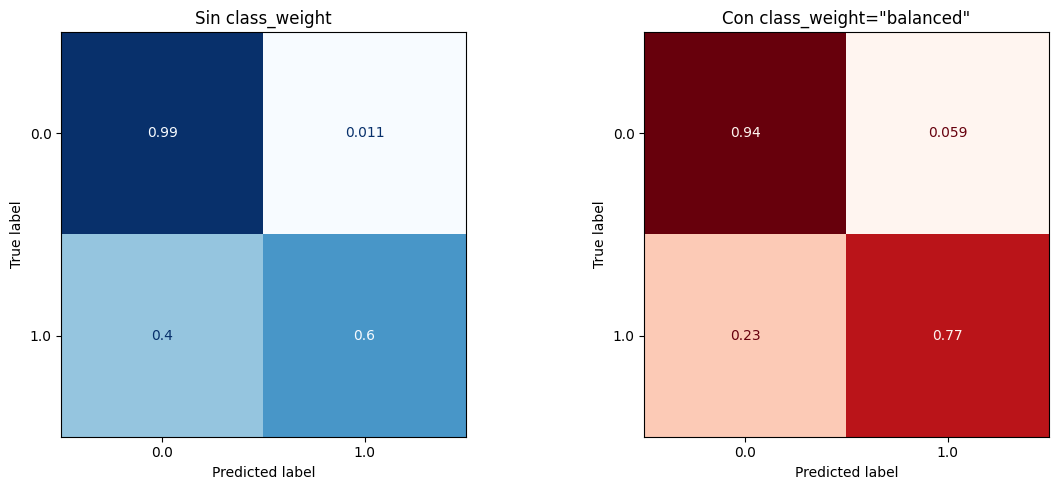

Reporte sin class_weight:
              precision    recall  f1-score   support

         0.0      0.957     0.989     0.973       270
         1.0      0.857     0.600     0.706        30

    accuracy                          0.950       300
   macro avg      0.907     0.794     0.839       300
weighted avg      0.947     0.950     0.946       300


Reporte con class_weight='balanced':
              precision    recall  f1-score   support

         0.0      0.973     0.941     0.957       270
         1.0      0.590     0.767     0.667        30

    accuracy                          0.923       300
   macro avg      0.781     0.854     0.812       300
weighted avg      0.935     0.923     0.928       300



In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

# 1. Generar datos simulados con dos características
np.random.seed(42)
X_majority = np.random.normal(loc=0, scale=1, size=(900, 2))  # Clase 0
y_majority = np.zeros(900)

X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))  # Clase 1
y_minority = np.ones(100)

X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 3. Entrenar modelos
model_default = LogisticRegression()
model_weighted = LogisticRegression(class_weight='balanced')

model_default.fit(X_train, y_train)
model_weighted.fit(X_train, y_train)

# 4. Predicciones
y_pred_default = model_default.predict(X_test)
y_pred_weighted = model_weighted.predict(X_test)

# 5. Visualizar matrices de confusión normalizadas por clase
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#fig.suptitle('Matriz de Confusión Normalizada por Clase', fontsize=16)

# Sin ponderación
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_default, ax=axes[0], cmap='Blues',
    normalize='true', colorbar=False
)
axes[0].set_title('Sin class_weight')

# Con class_weight='balanced'
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_weighted, ax=axes[1], cmap='Reds',
    normalize='true', colorbar=False
)
axes[1].set_title('Con class_weight="balanced"')

plt.tight_layout()
plt.show()

# 6. Métricas de clasificación
print("Reporte sin class_weight:")
print(classification_report(y_test, y_pred_default, digits=3))

print("\nReporte con class_weight='balanced':")
print(classification_report(y_test, y_pred_weighted, digits=3))


<div style="background-color:#f5f5f5; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

**Resultado:**  
- Class Weighting modifica la función de costo para penalizar más los errores en la clase minoritaria.
- Mejora la recall y la F1-score de la clase 1 sin duplicar ni sintetizar datos.


**Ventajas y Desventajas:**  

Asigna un mayor peso a la clase minoritaria durante el entrenamiento del modelo para penalizar más los errores cometidos sobre ella, sin alterar el tamaño del conjunto de datos [(King & Zeng, 2001)](https://doi.org/10.1017/S0003055401003107); [(Lemaître et al., 2017)](https://jmlr.org/papers/v18/16-365.html). Por lo tanto:

- Permite equilibrar el impacto de cada clase sin necesidad de generar o eliminar muestras, siendo especialmente útil en modelos lineales y de árboles.  
- Puede requerir ajuste fino de los pesos para evitar sobrecompensar la clase minoritaria y provocar un incremento de falsos positivos.

</div>

## **b. Umbral de decisión ajustado**  
En lugar de modificar los datos, se ajusta el **umbral de probabilidad** de clasificación para mejorar el equilibrio entre *precisión* y *recall*. Reducir el umbral (por ejemplo, de 0.5 a 0.3) puede aumentar la detección de la clase minoritaria, especialmente en modelos probabilísticos como *Logistic Regression* o *Gradient Boosting* ([Fawcett, 2006](https://doi.org/10.1016/j.patrec.2005.10.010)).  

En modelos probabilísticos como **Logistic Regression**, el modelo estima:

$$
P(y = 1 \mid X) = \text{sigmoid}(w^{\top}X + b)
$$

Donde:

$$
w^{\top}X + b
$$

es la **combinación lineal** de las características.  

La **función sigmoide** convierte ese valor en una probabilidad entre 0 y 1:

$$
\text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$


El modelo predice la **clase 1** si:

$$
P(y = 1 \mid X) \geq \theta
$$

Donde *theta* es el **umbral de decisión** y por defecto, *theta* = 0.5.


## **Ejemplos de ajuste del umbral de decisión**

- Si  theta = 0.5  → Predice clase **1** si la probabilidad es ≥ 0.5.
- Si  theta = 0.3  → Predice clase **1** si la probabilidad es ≥ 0.3 → se detectan **más casos positivos** (mayor *recall*).
- Si  theta = 0.8  → Predice clase **1** si la probabilidad es ≥ 0.8 → el modelo es **más conservador** (mayor *precisión*).



## **Métricas clave en clasificación**

| **Métrica** | **¿Qué mide?** | **Interpretación práctica** |
|--------------|----------------|------------------------------|
| **Accuracy** | Proporción de predicciones correctas sobre el total | Puede ser engañosa si hay desbalance (acierta mucho en la clase mayoritaria). |
| **Precision** | De los que predije como positivos, ¿cuántos lo eran realmente? | Alta precisión = pocos falsos positivos. |
| **Recall (Sensibilidad)** | De los positivos reales, ¿cuántos detecté correctamente? | Alta recall = pocos falsos negativos (importante en detección de fraude o enfermedades). |
| **F1-score** | Media armónica entre precisión y recall | Equilibrio entre precisión y recall; útil cuando hay desbalance. |

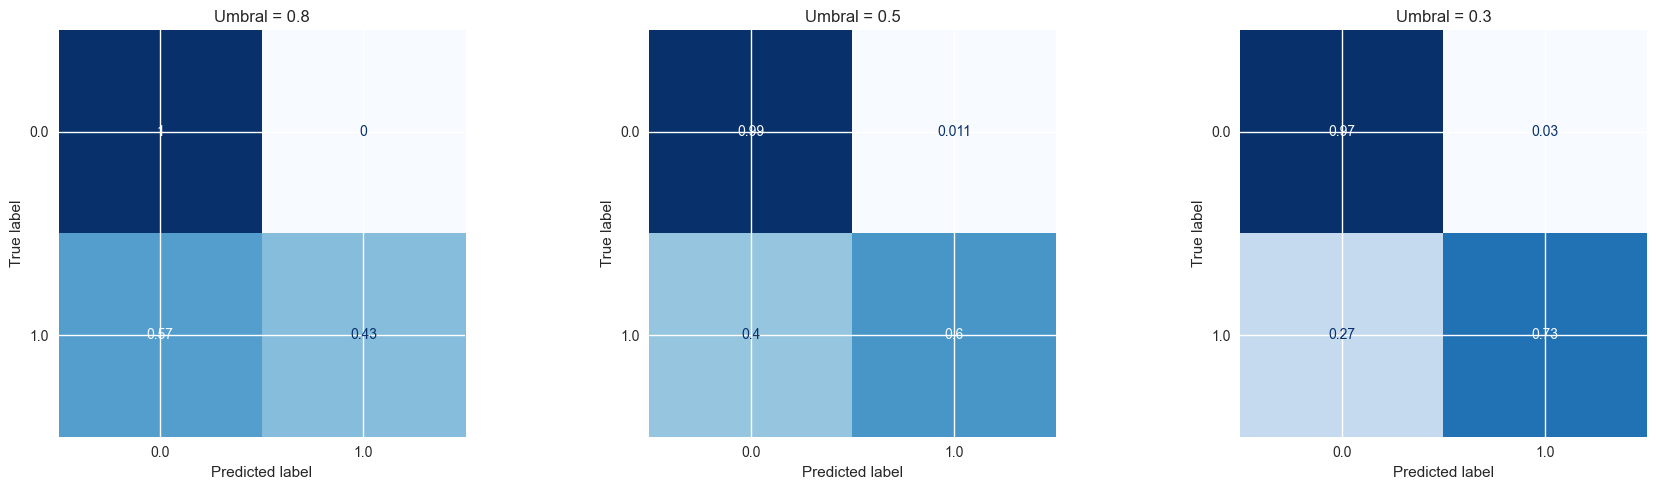


🔹 Reporte con umbral = 0.8
              precision    recall  f1-score   support

         0.0      0.941     1.000     0.969       270
         1.0      1.000     0.433     0.605        30

    accuracy                          0.943       300
   macro avg      0.970     0.717     0.787       300
weighted avg      0.947     0.943     0.933       300


🔹 Reporte con umbral = 0.5
              precision    recall  f1-score   support

         0.0      0.957     0.989     0.973       270
         1.0      0.857     0.600     0.706        30

    accuracy                          0.950       300
   macro avg      0.907     0.794     0.839       300
weighted avg      0.947     0.950     0.946       300


🔹 Reporte con umbral = 0.3
              precision    recall  f1-score   support

         0.0      0.970     0.970     0.970       270
         1.0      0.733     0.733     0.733        30

    accuracy                          0.947       300
   macro avg      0.852     0.852     0.852 

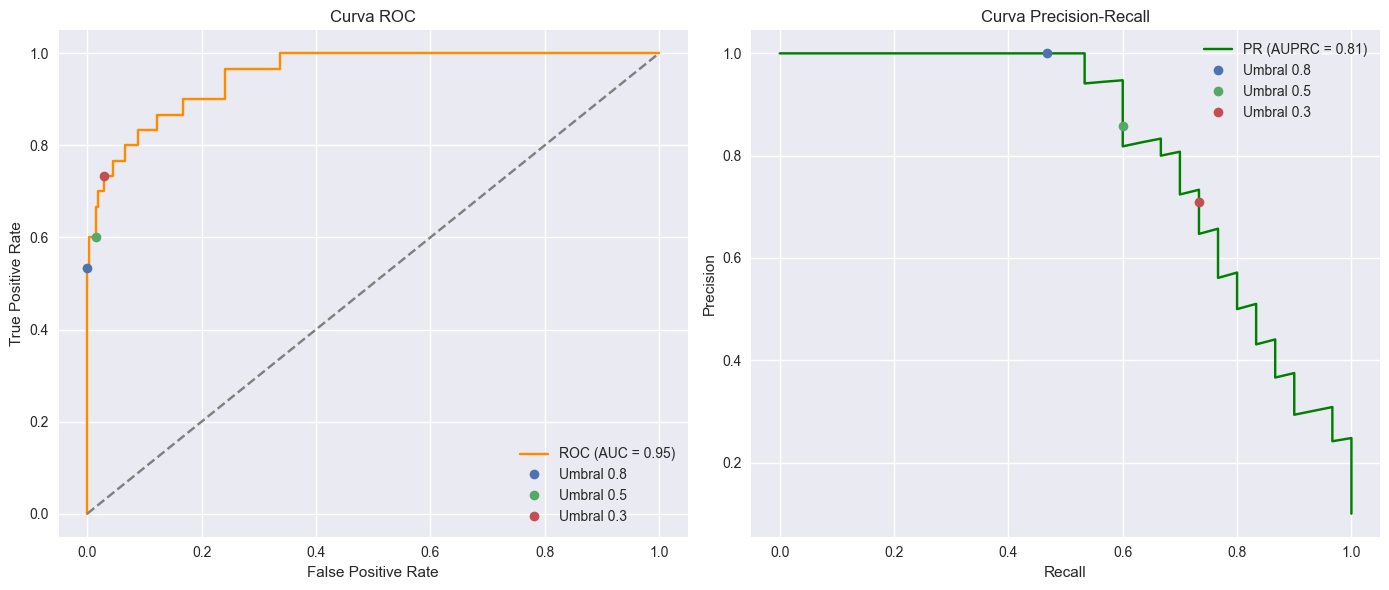

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    precision_recall_curve,
    auc
)
from sklearn.model_selection import train_test_split

# 1. Generar datos simulados
np.random.seed(42)
X_majority = np.random.normal(loc=0, scale=1, size=(900, 2))  # Clase 0
y_majority = np.zeros(900)

X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))  # Clase 1
y_minority = np.ones(100)

X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 3. Entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Obtener probabilidades
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Definir umbrales
thresholds = [0.8, 0.5, 0.3]

# 6. Visualizar matrices de confusión normalizadas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
#fig.suptitle('Matriz de Confusión Normalizada por Clase según Umbral', fontsize=16)

for i, thresh in enumerate(thresholds):
    y_pred_thresh = (y_proba >= thresh).astype(int)
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_thresh, ax=axes[i], cmap='Blues',
        normalize='true', colorbar=False
    )
    axes[i].set_title(f'Umbral = {thresh}')

plt.tight_layout()
plt.show()

# 7. Reportes de clasificación
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"\n🔹 Reporte con umbral = {thresh}")
    print(classification_report(y_test, y_pred_thresh, digits=3))

# 8. Curvas ROC y Precision-Recall con marcadores
fpr, tpr, roc_thresh = roc_curve(y_test, y_proba)
precision, recall, pr_thresh = precision_recall_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
pr_auc = auc(recall, precision)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
#fig.suptitle('Curvas ROC y Precision-Recall con Umbrales Marcados', fontsize=16)

# ROC
axes[0].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})', color='darkorange')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
for thresh in thresholds:
    idx = np.argmin(np.abs(roc_thresh - thresh))
    axes[0].plot(fpr[idx], tpr[idx], 'o', label=f'Umbral {thresh}', markersize=7)
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Curva ROC')
axes[0].legend()

# Precision-Recall
axes[1].plot(recall, precision, label=f'PR (AUPRC = {pr_auc:.2f})', color='green')
for thresh in thresholds:
    idx = np.argmin(np.abs(pr_thresh - thresh))
    axes[1].plot(recall[idx], precision[idx], 'o', label=f'Umbral {thresh}', markersize=7)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Curva Precision-Recall')
axes[1].legend()

plt.tight_layout()
plt.show()


<div style="background-color:#f5f5f5; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

**Resultado:**  
- El umbral por defecto es 0.5, pero puede ajustarse para cambiar el comportamiento del modelo.
- Reducir el umbral (por ejemplo, a 0.3) aumenta la recall de la clase minoritaria (más positivos detectados), aunque puede reducir la precisión.


**Ventajas y Desventajas:**  

Modifica el punto de corte del modelo (por defecto 0.5 en clasificadores probabilísticos) para mejorar el equilibrio entre precisión y recall en clases desbalanceadas [(Japkowicz & Stephen, 2002)](https://doi.org/10.3233/IDA-2002-6504). Por lo tanto:

- Facilita adaptar el modelo a las prioridades del problema (por ejemplo, minimizar falsos negativos en detección de fraudes o diagnósticos médicos).  
- No altera el modelo ni los datos, pero requiere un análisis cuidadoso de métricas como AUC-ROC o F1-score para seleccionar el umbral óptimo, lo que puede variar entre contextos.


</div>

# <span style="color:black;"><strong>3. Métodos basados en la evaluación</strong></span> 

Proponen el uso de **métricas especializadas** que permiten medir de manera más justa el rendimiento en contextos desbalanceados.  

## **a. Uso de métricas adecuadas**
Dado que la **precisión global** puede ser engañosa en contextos desbalanceados, se recomienda utilizar métricas que reflejen el rendimiento por clase. Las más utilizadas son *recall (sensibilidad)*, *F1-score*, *balanced accuracy*, *ROC-AUC* y *Precision-Recall AUC*, que permiten evaluar de manera más justa el desempeño del modelo sobre clases minoritarias ([Saito & Rehmsmeier, 2015](https://doi.org/10.1371/journal.pone.0118432)).  


| **Métrica** | **¿Qué mide?** | **¿Por qué es útil?** |
|--------------|----------------|------------------------|
| **Recall (Sensibilidad)** | Proporción de positivos reales correctamente detectados | Evalúa qué tan bien se detecta la clase minoritaria. |
| **F1-score** | Media armónica entre precisión y recall | Equilibra ambos aspectos; útil cuando hay desbalance. |
| **Balanced Accuracy** | Promedio de recall por clase | Corrige el sesgo hacia la clase mayoritaria. |
| **ROC-AUC** | Área bajo la curva ROC (TPR vs FPR) | Evalúa el rendimiento general del modelo en todos los umbrales. |
| **Precision-Recall AUC** | Área bajo la curva Precision-Recall | Más informativa que ROC-AUC cuando hay desbalance severo. |


              Métrica  Valor
0            Accuracy  0.950
1   Balanced Accuracy  0.794
2    Recall (Clase 0)  0.989
3    Recall (Clase 1)  0.600
4  F1-score (Clase 0)  0.973
5  F1-score (Clase 1)  0.706
6             ROC-AUC  0.954
7              PR-AUC  0.815


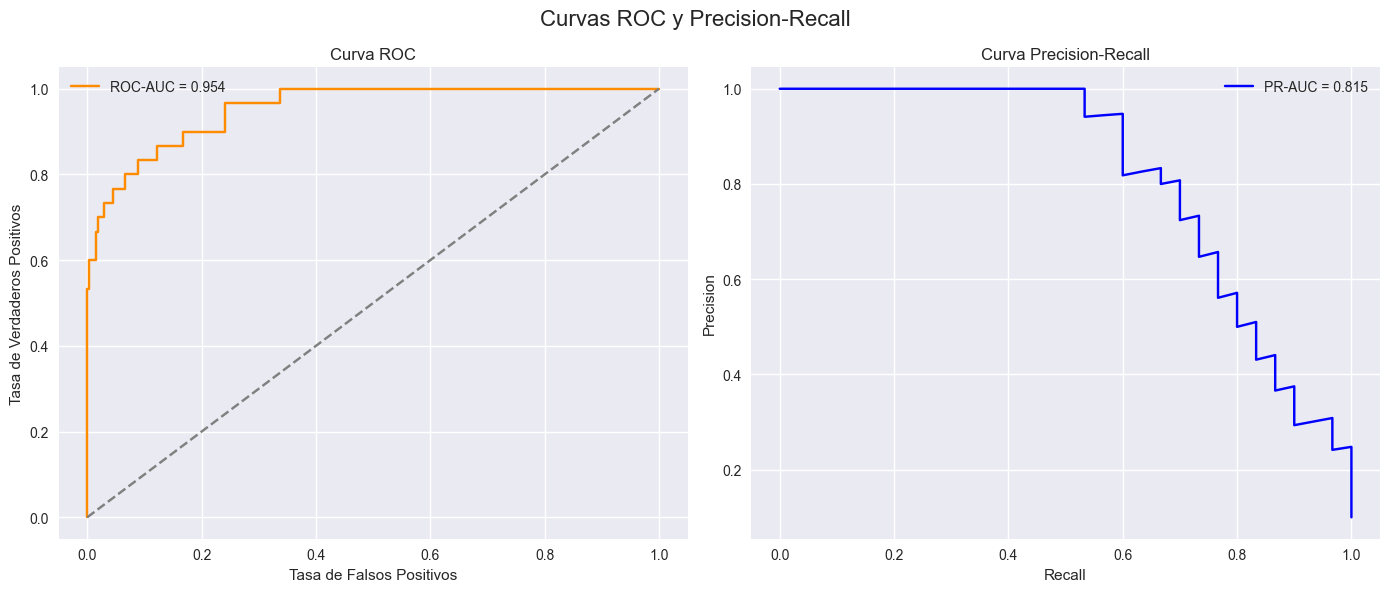

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
    roc_curve
)

# 1. Generar datos simulados desbalanceados
np.random.seed(42)
X_majority = np.random.normal(loc=0, scale=1, size=(900, 2))  # Clase 0
y_majority = np.zeros(900)

X_minority = np.random.normal(loc=2, scale=1, size=(100, 2))  # Clase 1
y_minority = np.ones(100)

X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 3. Entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predicciones y probabilidades
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_proba)

precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# 6. Mostrar tabla resumen
metrics_table = pd.DataFrame({
    'Métrica': ['Accuracy', 'Balanced Accuracy', 'Recall (Clase 0)', 'Recall (Clase 1)',
                'F1-score (Clase 0)', 'F1-score (Clase 1)', 'ROC-AUC', 'PR-AUC'],
    'Valor': [accuracy, balanced_acc, recall_0, recall_1, f1_0, f1_1, roc_auc, pr_auc]
})
print(metrics_table.round(3))

# 7. Graficar curvas ROC y Precision-Recall
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
axes[0].plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.3f}', color='darkorange')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_xlabel('Tasa de Falsos Positivos')
axes[0].set_ylabel('Tasa de Verdaderos Positivos')
axes[0].set_title('Curva ROC')
axes[0].legend()

# Precision-Recall
axes[1].plot(recall, precision, label=f'PR-AUC = {pr_auc:.3f}', color='blue')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Curva Precision-Recall')
axes[1].legend()

plt.tight_layout()
plt.show()


<div style="background-color:#fce4ec; padding:15px; border-radius:8px; font-size:17px;"> 
<b></b>

**Análisis:**  
- La precisión global (accuracy) puede ser engañosa en problemas de clasificación desbalanceada porque no distingue entre clases. Solo mide el porcentaje total de aciertos, sin importar si el modelo está ignorando por completo la clase minoritaria.
- Supón que tienes un conjunto de datos con 95% clase 0 (negativa) y 5% clase 1 (positiva). Si el modelo siempre predice clase 0, entonces:
  - Acierta el 95% de las veces → accuracy = 0.95
  - Nunca detecta la clase 1 → recall clase 1 = 0.00
- La fórmula de la **Accuracy** es:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Donde:  
- **TP** = Verdaderos Positivos  
- **TN** = Verdaderos Negativos  
- **FP** = Falsos Positivos  
- **FN** = Falsos Negativos  

Si la mayoría de los datos pertenecen a la clase negativa (**TN**), el modelo puede mostrar una *accuracy* alta simplemente acertando los negativos,  **sin realmente aprender a identificar los casos positivos**.

</div>

# <span style="color:black;"><strong>4. Métodos avanzados y recientes</strong></span> 

Integran enfoques de **aprendizaje profundo** y **técnicas de ensemble**, como *GANs*, *VAEs*, *Balanced Random Forest* o *RUSBoost*, que buscan generar ejemplos más realistas y mejorar la detección de clases minoritarias.  

## **a. Generación de datos sintéticos mediante aprendizaje profundo**  
Técnicas recientes emplean **redes generativas** para crear instancias artificiales de la clase minoritaria que mantengan la coherencia con la distribución real. Entre ellas destacan las *Generative Adversarial Networks (GANs)* y los *Variational Autoencoders (VAEs)*, los cuales mejoran la diversidad de los ejemplos y reducen el sobreajuste en tareas con escasez de datos ([Mariani et al., 2018](https://doi.org/10.1109/CVPRW.2018.00143)).  

## **b. Enfoques de Ensemble para clases desbalanceadas**  
Los métodos de *ensemble* combinan múltiples modelos entrenados sobre subconjuntos balanceados del conjunto original. Ejemplos notables son *Balanced Random Forest*, *EasyEnsemble* y *RUSBoost*, que incrementan la estabilidad del aprendizaje y la detección de clases minoritarias en entornos complejos ([Liu, Wu & Zhou, 2009](https://doi.org/10.1016/j.patrec.2008.10.019)).  






  